# 부스팅 방법

부스트(boost) 방법은 미리 정해진 갯수의 모형 집합을 사용하는 것이 아니라 하나의 모형에서 시작하여 모형 집합에 포함할 개별 모형을 하나씩 추가한다. 모형의 집합은 **위원회(commitee)** $C$라고 하고 $m$개의 모형을 포함하는 위원회를 $C_m$으로 표시한다.
위원회에 들어가는 개별 모형을 약 분류기(weak classifier)라고 하며 $k$로 표시한다. 

부스트 방법의 특징은 한번에 하나씩 모형을 추가한다는 것이다.

$$ C_1 = \{ k_1 \} $$

$$ C_2 = C_1 \cup k_2 = \{ k_1, k_2 \} $$

$$ C_3 = C_2 \cup k_3 = \{ k_1, k_2, k_3 \} $$

$$ \vdots $$

$$ C_m = C_{m-1} \cup k_m = \{ k_1, k_2, \ldots, k_m \} $$

그리고 $m$번째로 위원회에 추가할 개별 모형 $k_m$의 선택 기준은 그 전단계의 위원회 $C_{m-1}$의 성능을 보완하는 것이다.



위원회 $C_m$의 최종 결정은 다수결 방법을 사용하지 않고 각각의 개별 모형의 출력을 가중치 $\alpha$로 가중선형조합한 값을 판별 함수로 사용한다. 또한 부스트 방법은 이진 분류에만 사용할 수 있으며 $y$값은 1또는 -1의 값을 가진다.

$$ y = -1 \text{ or } 1 $$

$$ C_{m}(x_i) =  \text{sign} \left( \alpha_1k_1(x_i) + \cdots + \alpha_{m}k_{m}(x_i) \right) $$



## 에이다부스트

에이다부스트(adaboost)라는 이름은 적응 부스트(adaptive boost)라는 용어에서 나왔다. 에이다부스트는 위원회에 넣을 개별 모형 $k_m$을 선별하는 방법으로는 학습 데이터 집합의 $i$번째 데이터에 가중치 $w_i$를 주고 분류 모형이 틀리게 예측한 데이터의 가중치를 합한 값을 손실함수 $L$로 사용한다. 이 손실함수를 최소화하는 모형이 $k_m$으로 선택된다.

$$ L_m = \sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right)$$

위 식에서 $I$는 $k(x_i) \neq y_i$라는 조건이 만족되면 1, 아니면 0을 가지는 지시함수(indicator function)이다. 따라서 틀린 문제에 대한 가중치의 합이다.

위원회 $C_m$에 포함될 개별 모형 $k_m$이 선택된 후에는 가중치 $\alpha_m$를 결정해야 한다. 이 값은 다음처럼 계산한다.

$$ \epsilon_m = \dfrac{\sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right)}{\sum_{i=1}^N w_{m,i}} $$

$$ \alpha_m = \frac{1}{2}\log\left( \frac{1 - \epsilon_m}{\epsilon_m}\right) $$ 

데이터에 대한 가중치 $w_{m,i}$는 최초에는(m=1)모든 데이터에 대해 같은 값을 가지지만 위원회가 증가하면서 값이 바뀐다. 가중치의 값은 지수함수를 사용하여 위원회 $C_{m-1}$이 맞춘 문제는 작게, 틀린 문제는 크게 확대(boosting)된다.

$$ 
w_{m,i} = w_{m-1,i}  \exp (-y_iC_{m-1}) = 
\begin{cases}
w_{m-1,i}e^{-1}  & \text{ if } C_{m-1} = y_i\\
w_{m-1,i}e & \text{ if } C_{m-1} \neq y_i 
\end{cases}
$$

$m$번째 멤버의 모든 후보에 대해 위 손실 함수를 적용하여 가장 값이 작은 후보를 $m$번째 멤버로 선정한다.


에이다부스팅은 사실 다음과 같은 손실함수를 최소화하는 $C_m$을 찾아가는 방법이라는 것을 증명할 수 있다.

$$ L_m = \sum_{i=1}^N \exp(−y_i C_m(x_i)) $$

개별 멤버 $k_m$과 위원회의 관계는

$$ C_m(x_i) = \sum_{j=1}^m \alpha_j k_j(x_i) = C_{m-1}(x_i) + \alpha_m k_m(x_i) $$

이고 이 식을 대입하면 

$$
\begin{eqnarray}
L_m 
&=& \sum_{i=1}^N \exp(−y_i C_m(x_i)) \\
&=& \sum_{i=1}^N \exp\left(−y_iC_{m-1}(x_i) - \alpha_m y_i k_m(x_i) \right) \\
&=& \sum_{i=1}^N \exp(−y_iC_{m-1}(x_i)) \exp\left(-\alpha_m y_i k_m(x_i)\right) \\
&=& \sum_{i=1}^N w_{m,i} \exp\left(-\alpha_m y_i k_m(x_i)\right) \\
\end{eqnarray}
$$

$y_i$와 $k_M(x_i)$가 1 또는 -1값만 가질 수 있다는 점을 이용하면,

$$
\begin{eqnarray}
L_m 
&=& 
e^{-\alpha_m}\sum_{k_m(x_i) = y_i} w_{m,i} + e^{\alpha_m}\sum_{k_m(x_i) \neq y_i} w_{m,i} \\
&=& 
\left(e^{\alpha_m}-e^{-\alpha_m}\right) \sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right) + 
e^{-\alpha_m}\sum_{i=1}^N w_{m,i}
\end{eqnarray}
$$

$L_m$을 최소화하려면 $\sum_{i=1}^N w_{m,i} I\left(k_m(x_i) \neq y_i\right)$을 최소화하는 $k_m$ 함수를 찾은 다음 $L_m$을 최소화하는 $\alpha_m$을 찾아야 한다.

$$ \dfrac{d L_m}{d \alpha_m} = 0 $$

이 조건으로부터 $\alpha_m$ 공식을 유도할 수 있다.

다음은 scikit-learn의 ensemble 서브패키지가 제공하는 `AdaBoostClassifier` 클래스를 사용하여 분류 예측을 하는 예이다. 약분류기로는 깊이가 1인 단순한 의사결정나무를 채택하였다.

여기에서는 각 표본 데이터의 가중치 값을 알아보기 위해 기존의 `AdaBoostClassifier` 클래스를 서브클래싱하여 가중치를 속성으로 저장하도록 수정한 모형을 사용하였다.

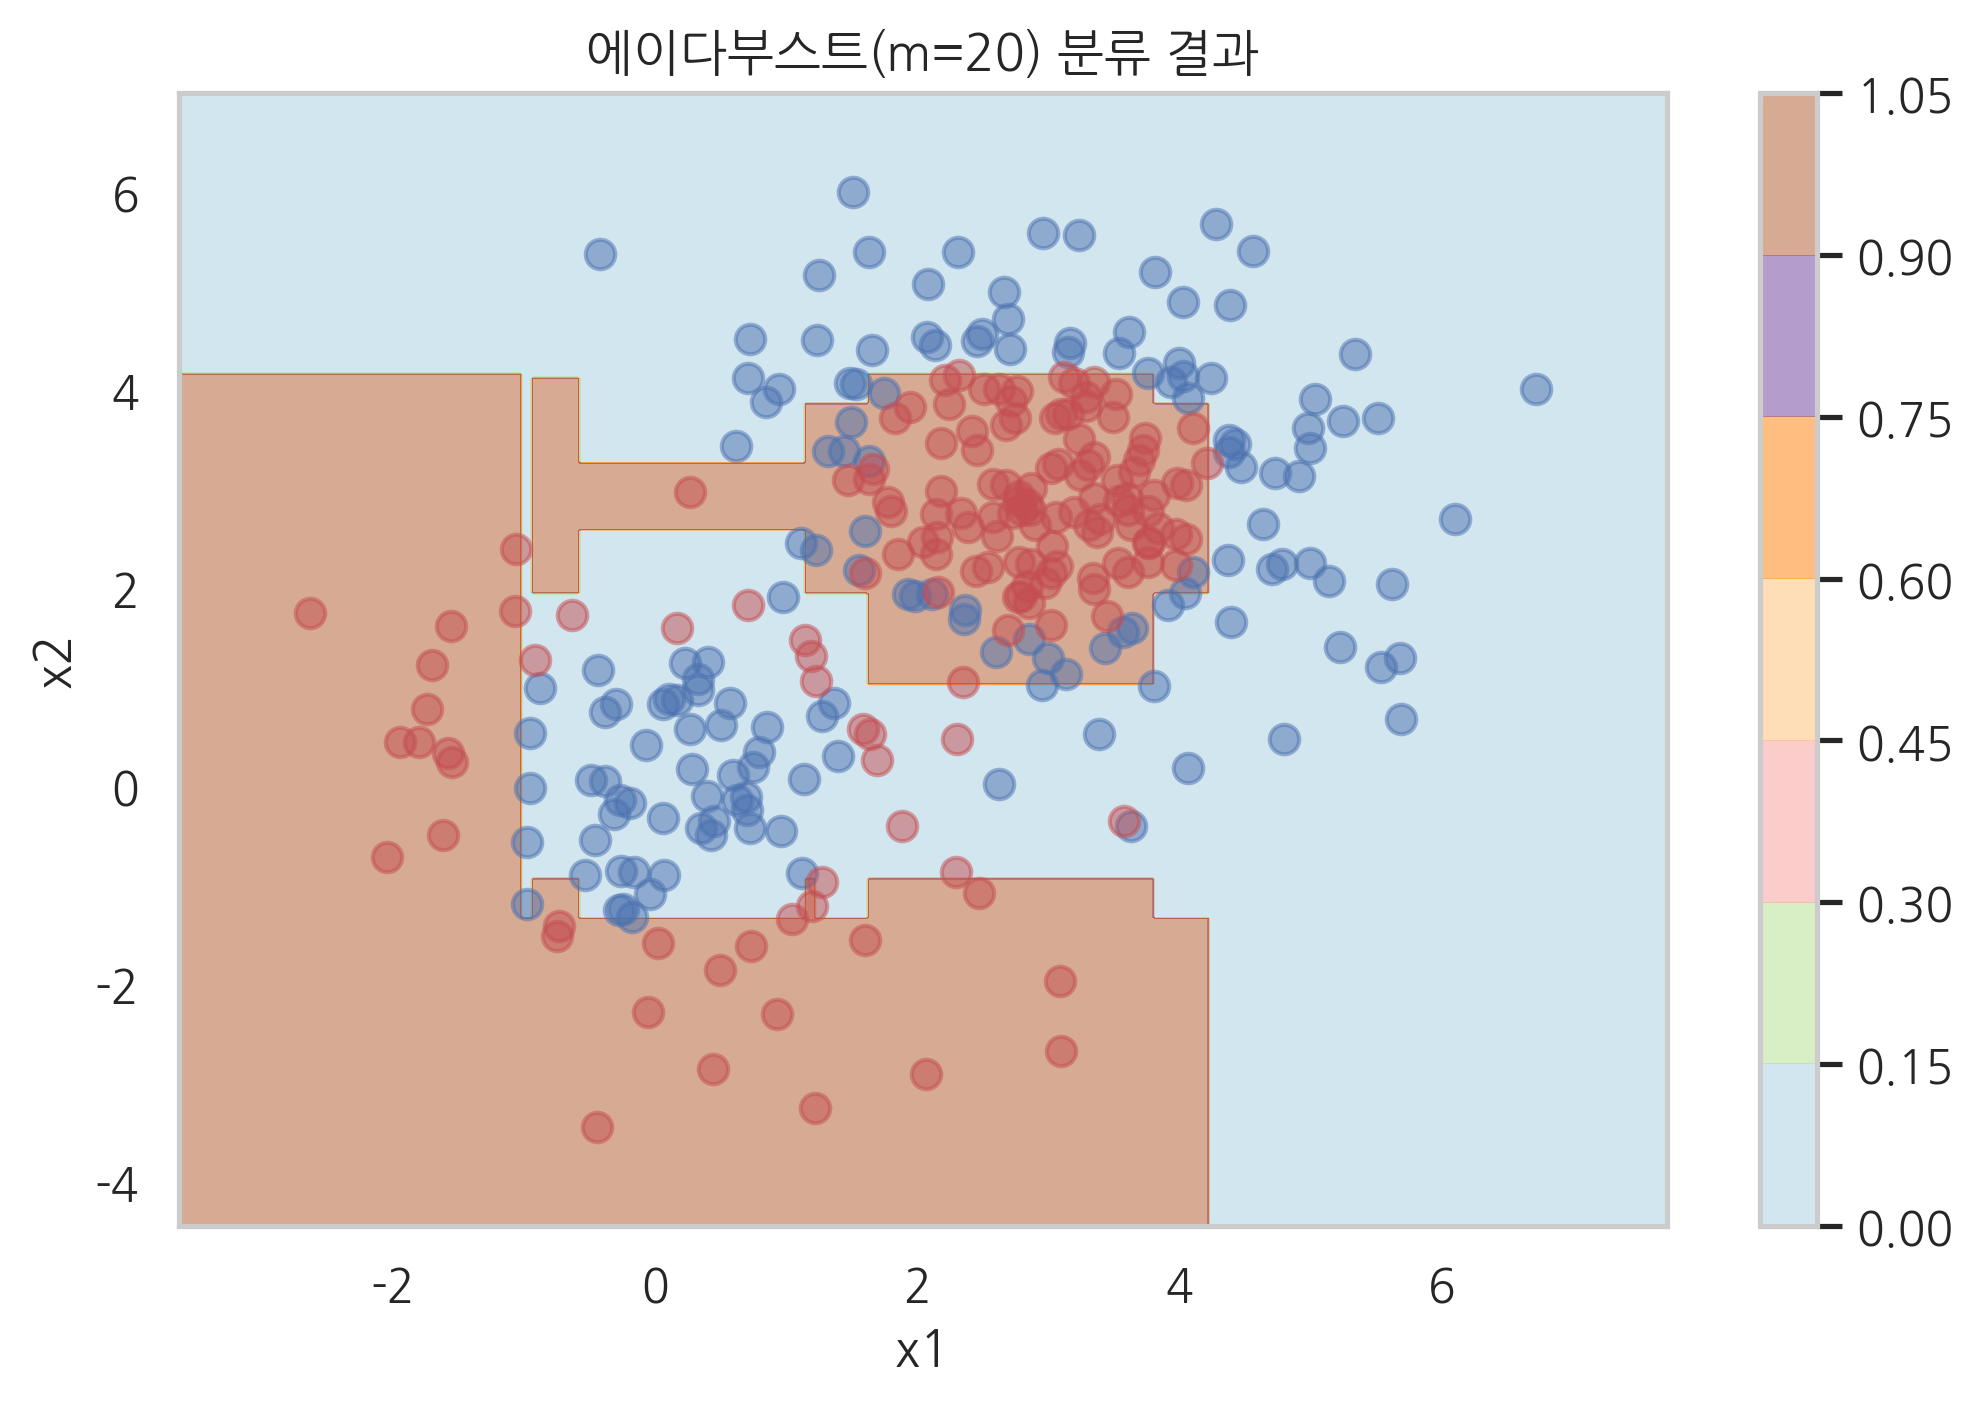

In [1]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None,
                 n_estimators=50,
                 learning_rate=1.,
                 algorithm='SAMME.R',
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error
    
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20)
model_ada.fit(X, y)

def plot_result(model, title="분류결과", legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    if isinstance(model, list):
        Y = model[0].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
        for i in range(len(model) - 1):
            Y += model[i + 1].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    else:
        Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)

plot_result(model_ada, "에이다부스트(m=20) 분류 결과")

각 단계의 분류 모형에 대한 가중치 값과 분류 모형의 분류 결과를 시각화하면 다음과 같다. 데이터의 가중치는 스캐터플롯의 점의 크기로 표현하였다. 단계가 진행될 수록 가중치값의 변화가 커지는 것을 볼 수 있다.

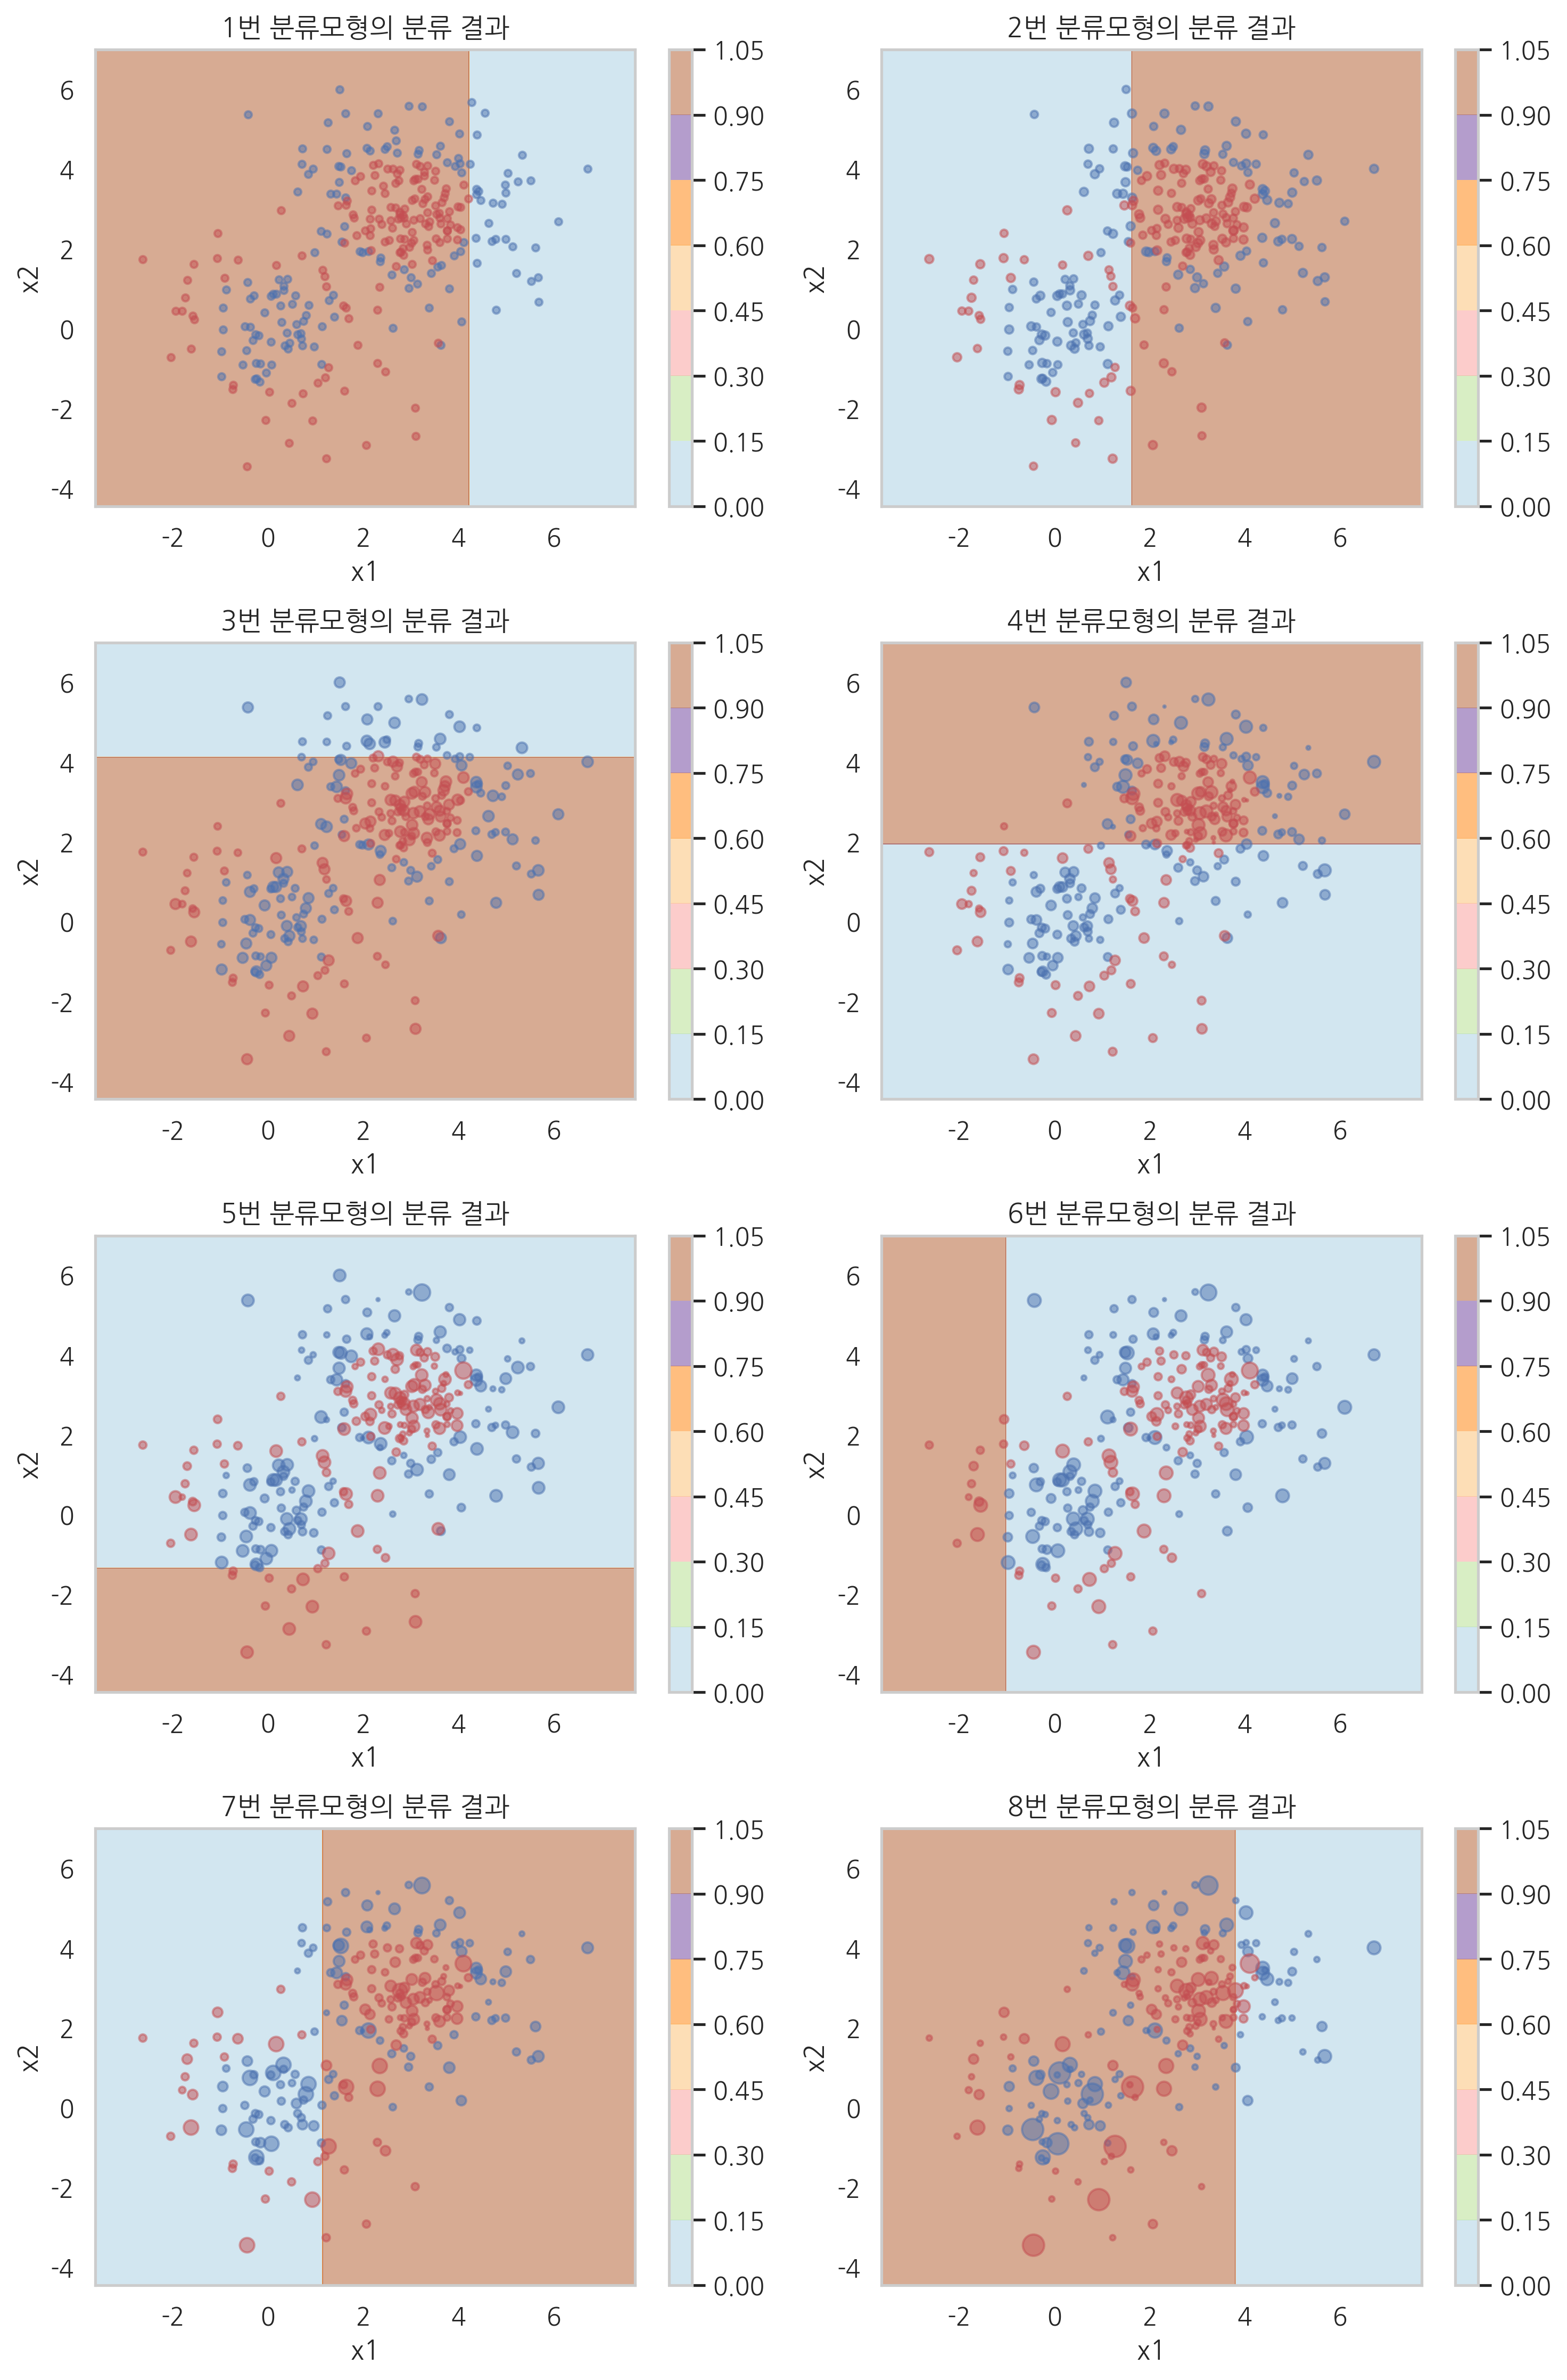

In [2]:
plt.figure(figsize=(10, 15))
plt.subplot(421); 
plot_result(model_ada.estimators_[0], "1번 분류모형의 분류 결과", s=10)
plt.subplot(422); 
plot_result(model_ada.estimators_[1], "2번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[0]).astype(int))
plt.subplot(423); 
plot_result(model_ada.estimators_[2], "3번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[1]).astype(int))
plt.subplot(424); 
plot_result(model_ada.estimators_[3], "4번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[2]).astype(int))
plt.subplot(425); 
plot_result(model_ada.estimators_[4], "5번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[3]).astype(int))
plt.subplot(426); 
plot_result(model_ada.estimators_[5], "6번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[4]).astype(int))
plt.subplot(427); 
plot_result(model_ada.estimators_[6], "7번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[5]).astype(int))
plt.subplot(428); 
plot_result(model_ada.estimators_[7], "8번 분류모형의 분류 결과", s=(4000*model_ada.sample_weight[6]).astype(int))
plt.tight_layout()

### 에이다부스트 모형의 정규화

에이다부스트 모형이 과최적화가 되는 경우에는 학습 속도(learning rate) 조정하여  정규화를 할 수 있다. 이는 필요한 멤버의 수를 강제로 증가시켜서 과최적화를 막는 역할을 한다.

$$
C_m = C_{m-1} + \mu \alpha_m k_m 
$$

`AdaBoostClassifier` 클래스에서는 `learning_rate` 인수를 1보다 적게 주면 새로운 멤버의 가중치를 강제로 낮춘다. 

#### 연습 문제 1

1. 위 예제에서 멤버의 수를 1000까지 100단위로 증가시키면서 성능의 변화를 살펴본다. 과최적화가 심해지는가 감소하는가?
2. 멤버의 수가 1000일 때 학습속도(`learning_rate`)인수를 조정하여 과최적화를 없애본다. K=5인 교차검정을 이용하여 가장 검증성능이 좋은 학습속도를 찾아라.

In [19]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

mean_test_accuracy = []
for n in np.arange(1, 1001, 100):
    model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n)
    mean_test_accuracy.append(cross_val_score(model1, X, y, cv=5).mean())

CPU times: user 2min 1s, sys: 1.62 s, total: 2min 2s
Wall time: 2min 4s


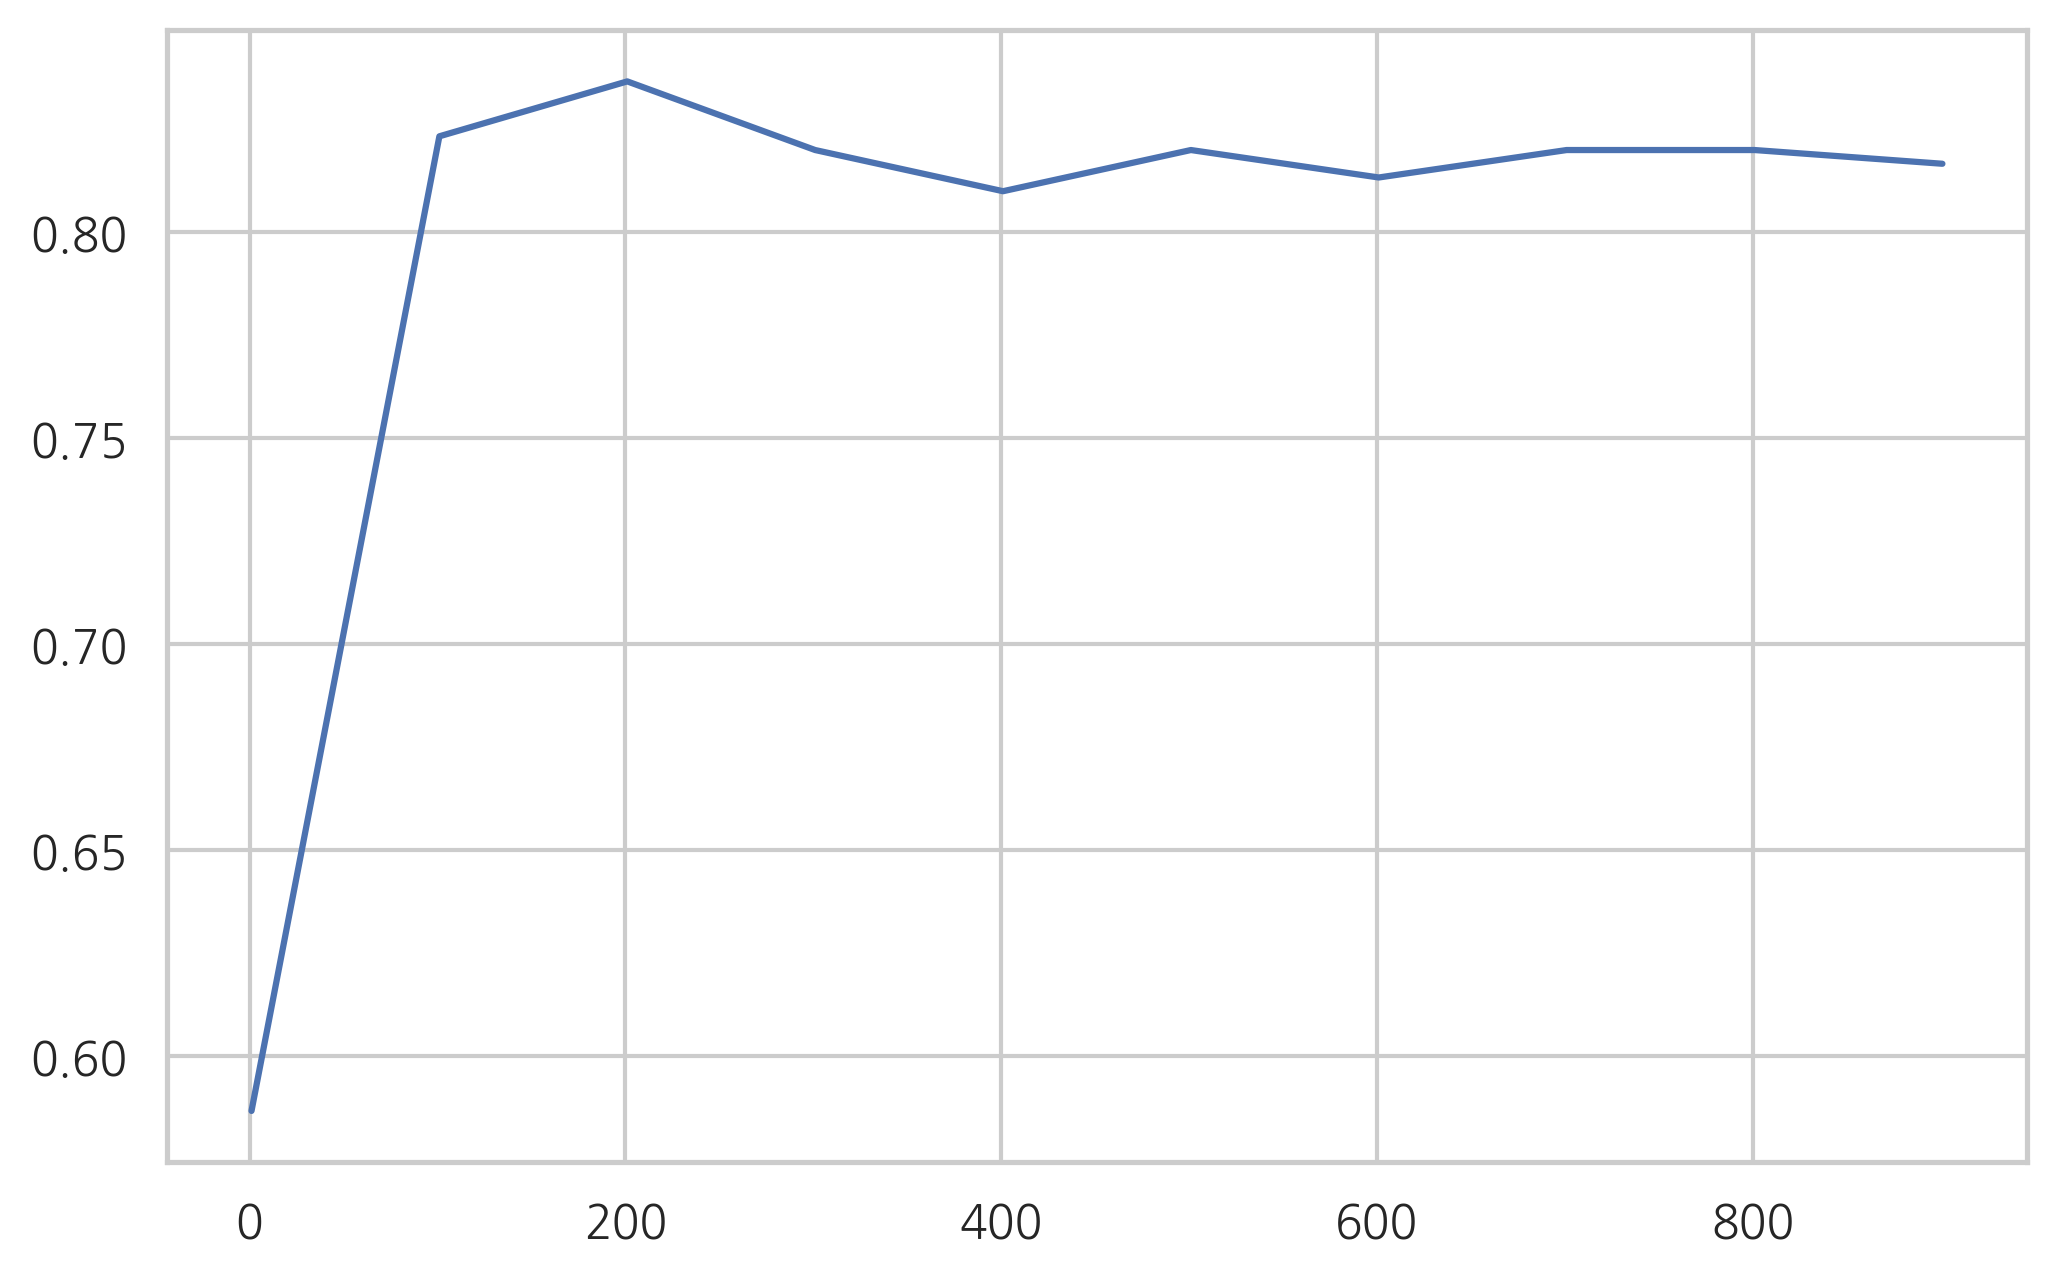

In [21]:
plt.plot(np.arange(1, 1000, 100), mean_test_accuracy)
plt.show()

## 그레디언트 부스트

그레이던트 부스트 모형은 변분법(calculus of variations)을 사용한 모형이다. 

함수 $f(x)$를 최소화하는 $x$는 다음과 같이 gradient descent 방법으로 찾을 수 있다.

$$ x_{m} = x_{m-1} - \alpha_m \dfrac{df}{dx} $$

그레디언트 부스트 모형에서는 손실 범함수(loss functional) $L(y, C_{m-1})$을 최소화하는 개별 분류함수 $k_m$를 찾는다. 이론적으로 가장 최적의 함수는 범함수의 미분이다.

$$ C_{m} = C_{m-1} - \alpha_m \dfrac{\delta L(y, C_{m-1})}{\delta C_{m-1}} = C_{m-1} + \alpha_m k_m $$

따라서 그레디언트 부스트 모형은 분류/회귀 문제에 상관없이 개별 멤버 모형으로 회귀분석 모형을 사용한다. 가장 많이 사용되는 회귀분석 모형은 의사결정 회귀나무(decision tree regression model) 모형이다. 

그레디언트 부스트 모형에서는 다음과 같은 과정을 반복하여 멤버와 그 가중치를 계산한다.

1. $-\tfrac{\delta L(y, C_m)}{\delta C_m}$ 를 목표값으로 개별 멤버 모형 $k_m$ 을 찾는다. 
2. $ \left( y - (C_{m-1} + \alpha_m k_m) \right)^2 $ 를 최소화하는 스텝사이즈 $\alpha_m$ 을 찾는다. 
3. $C_m = C_{m-1} + \alpha_m k_m$ 최종 모형을 갱신한다.

만약 손실 범함수가 오차 제곱 형태라면 

$$ L(y, C_{m-1}) = \dfrac{1}{2}(y - C_{m-1})^2 $$

범함수의 미분은 실제 목푯값 $y$와 $C_{m-1}$과의 차이 즉, 잔차(residual)가 된다.

$$ -\dfrac{dL(y, C_m)}{dC_m} = y - C_{m-1} $$

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [4]:
%%time
model_grad.fit(X, y)

CPU times: user 50 ms, sys: 0 ns, total: 50 ms
Wall time: 50.4 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

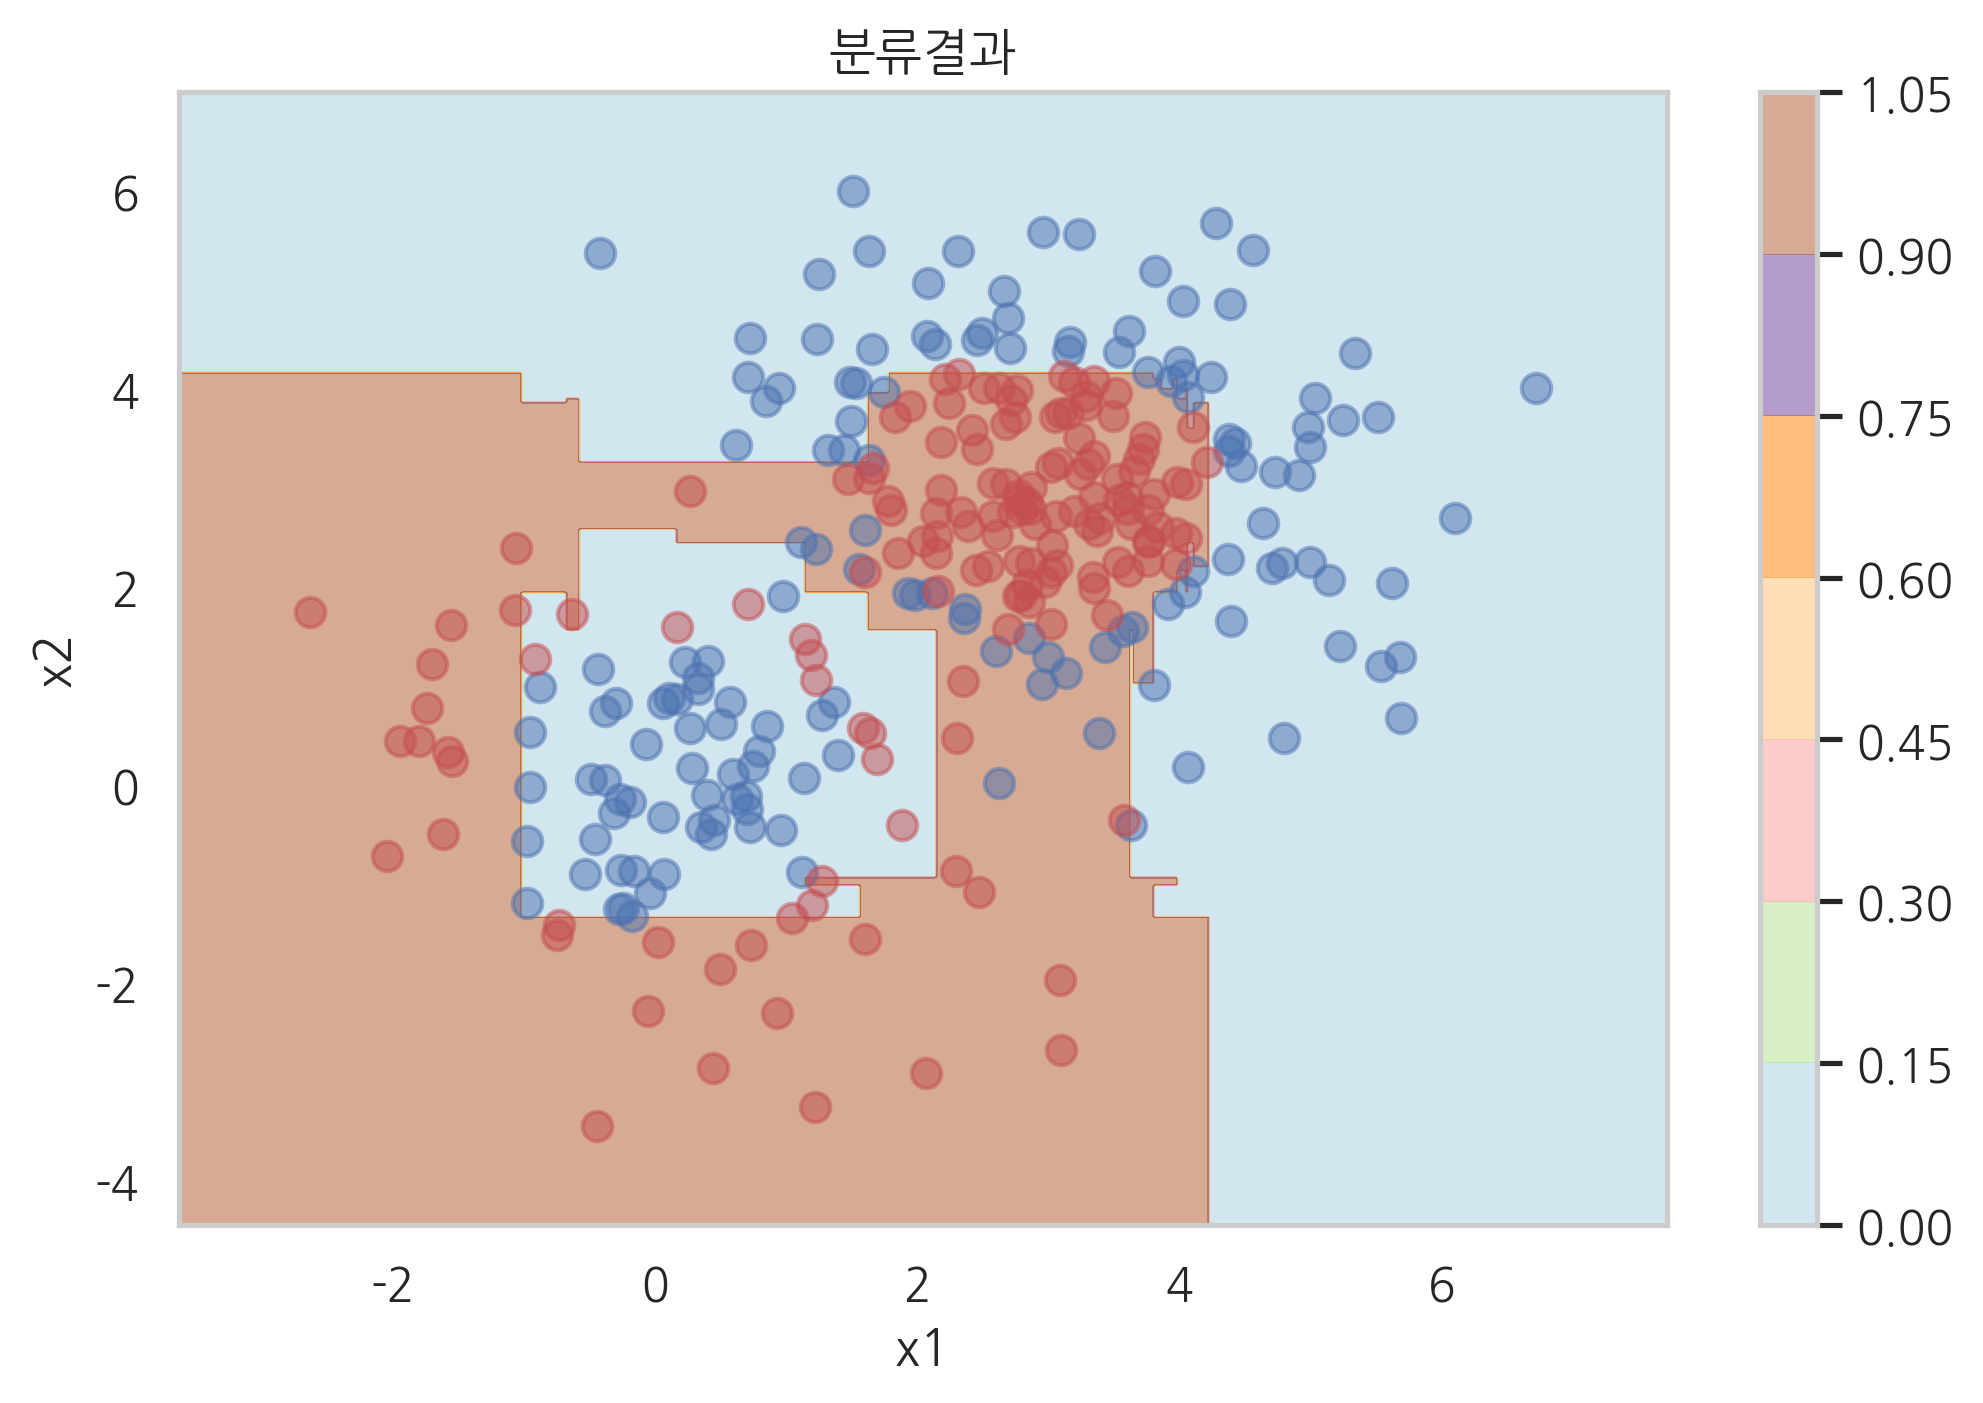

In [5]:
plot_result(model_grad)

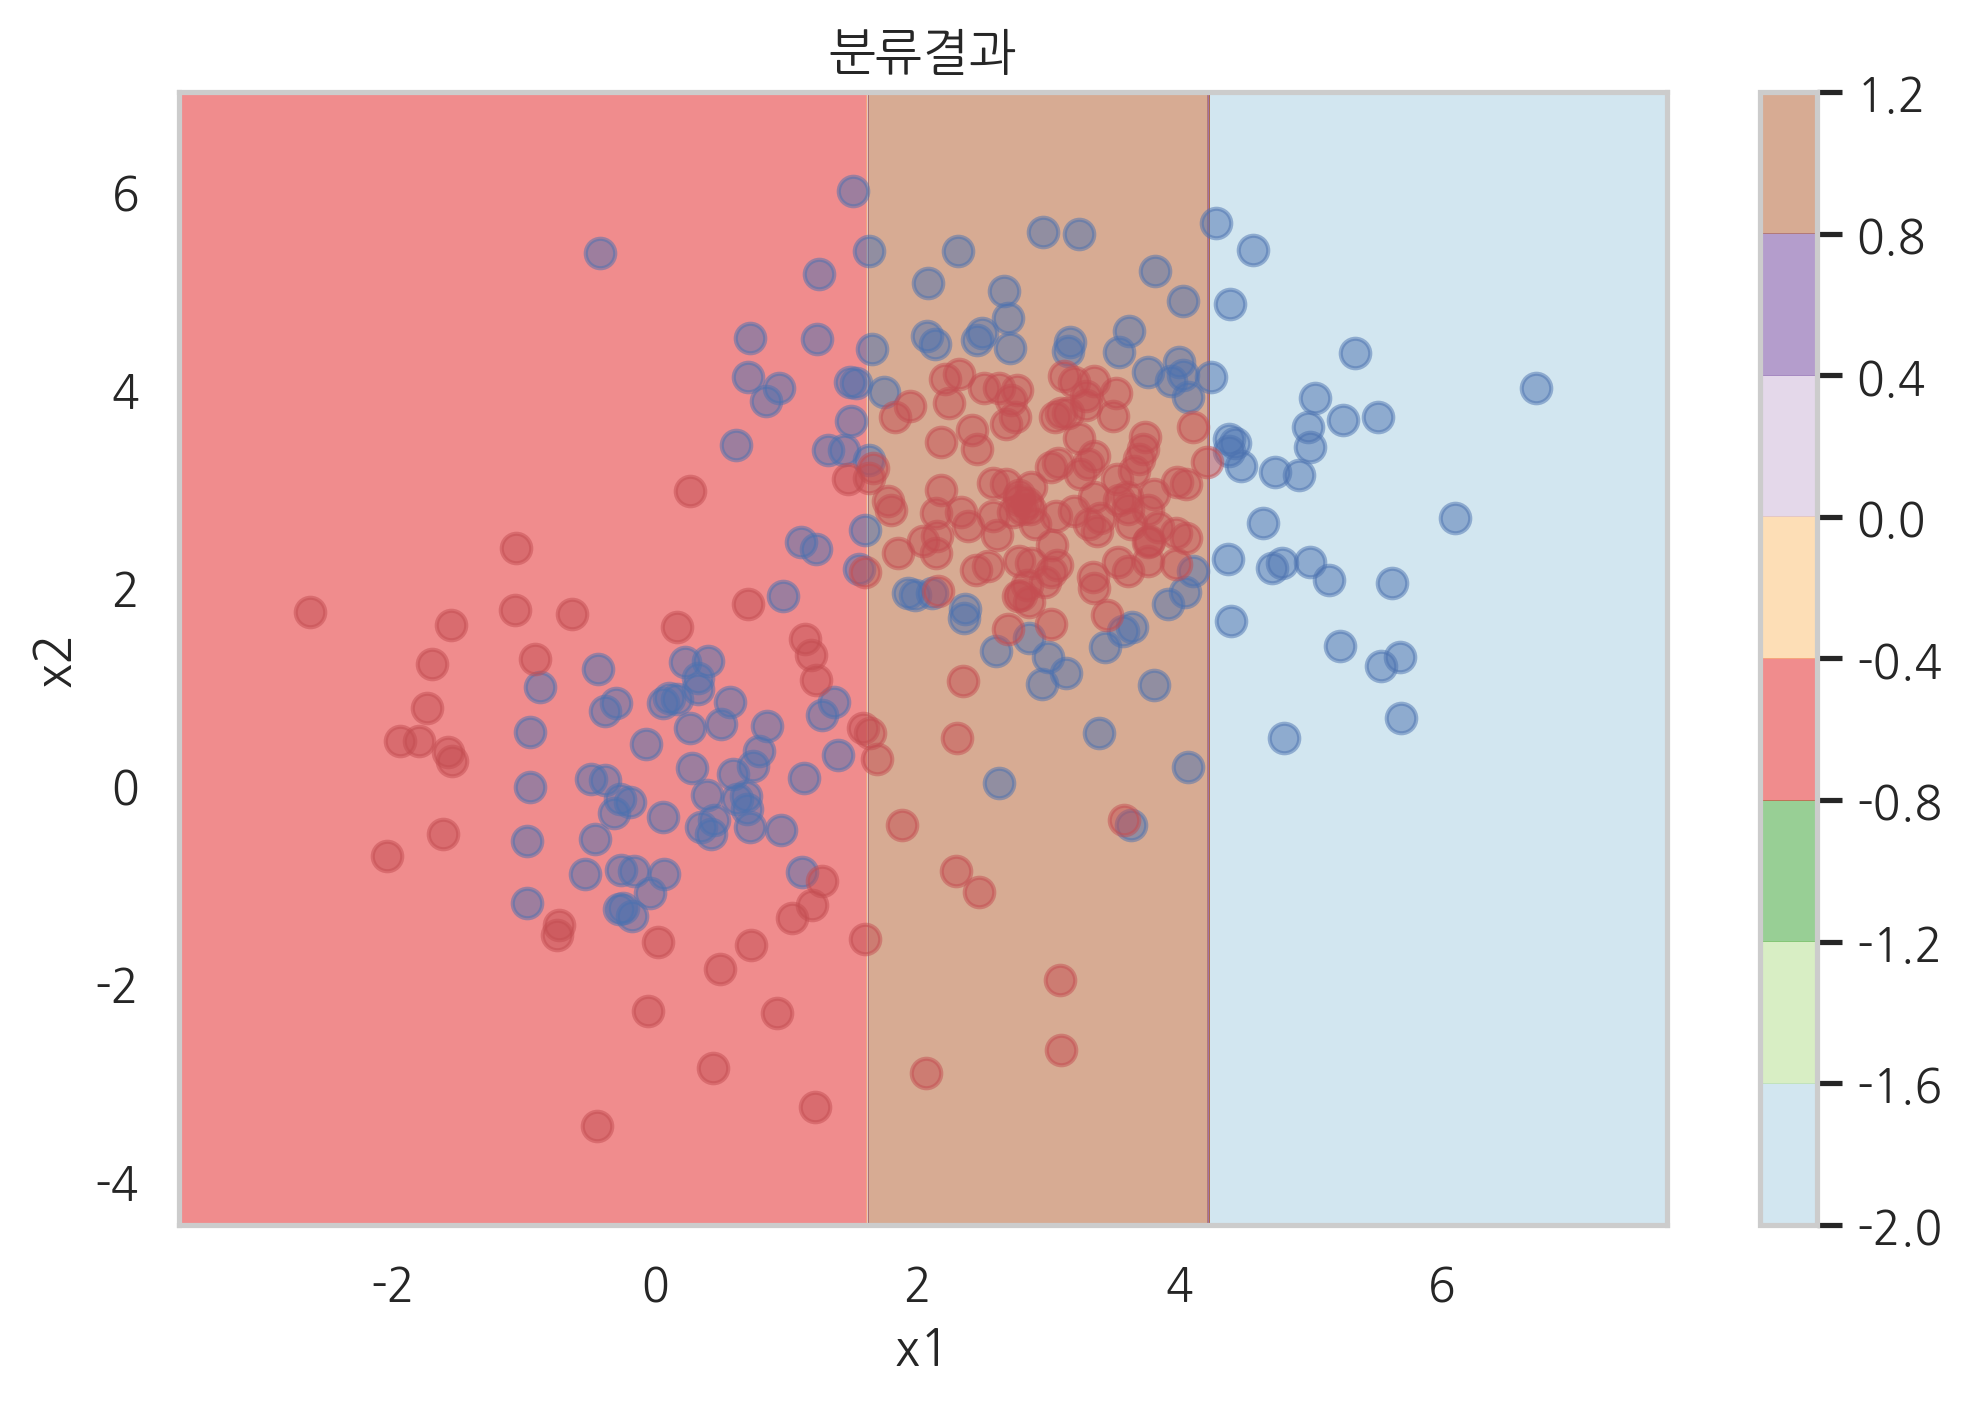

In [6]:
plot_result(model_grad.estimators_[0][0])

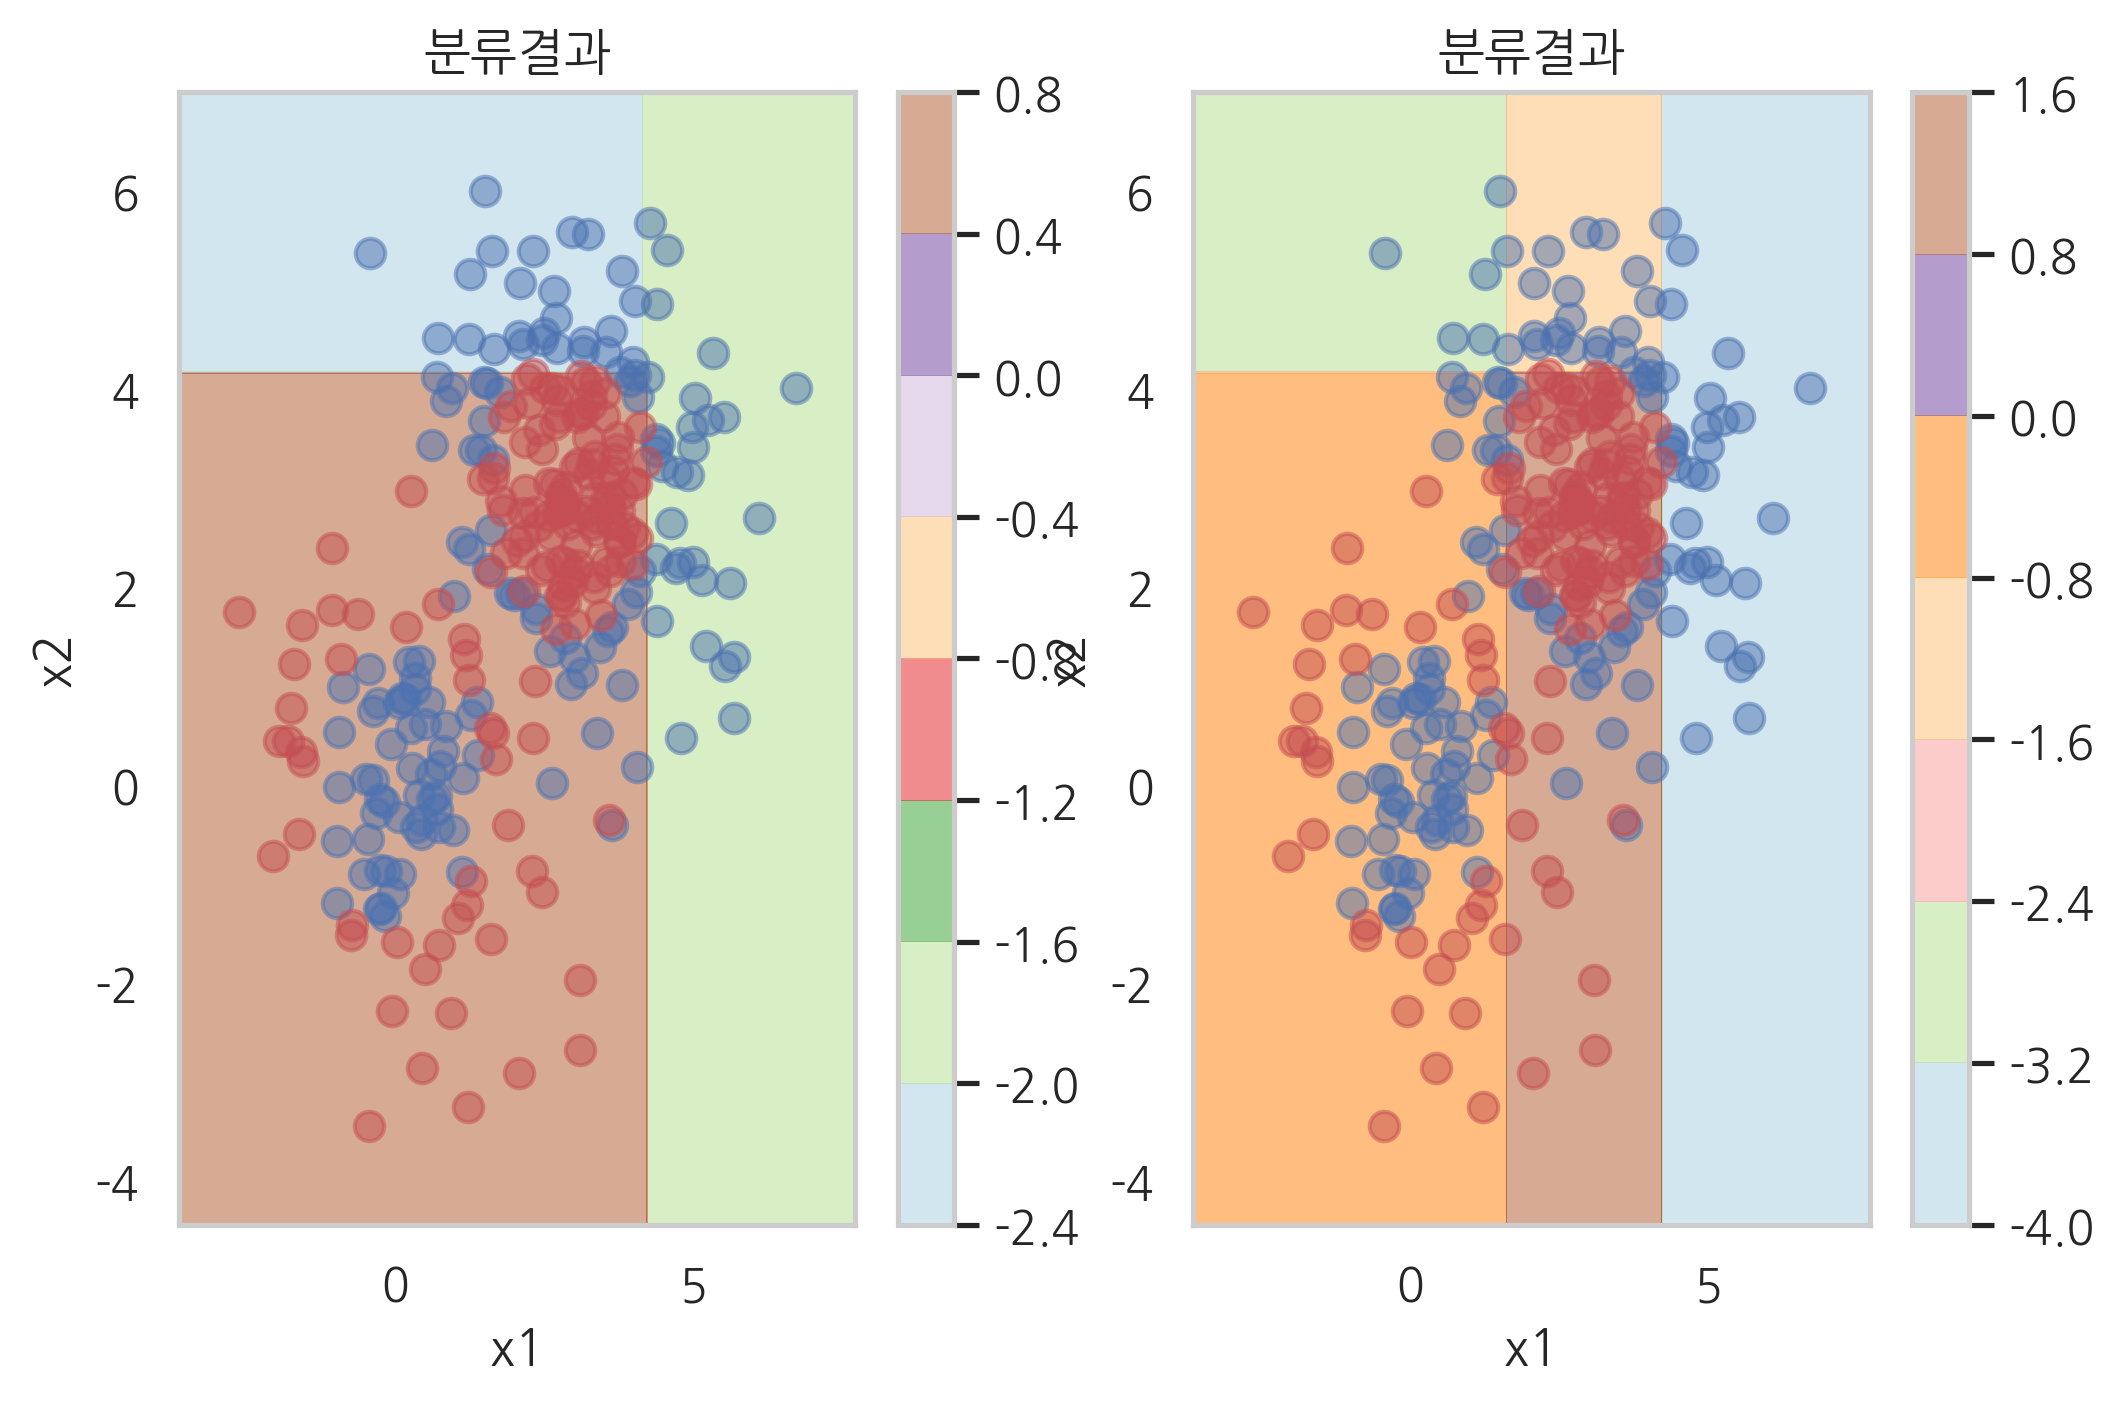

In [7]:
plt.subplot(121)
plot_result(model_grad.estimators_[1][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], model_grad.estimators_[1][0]])

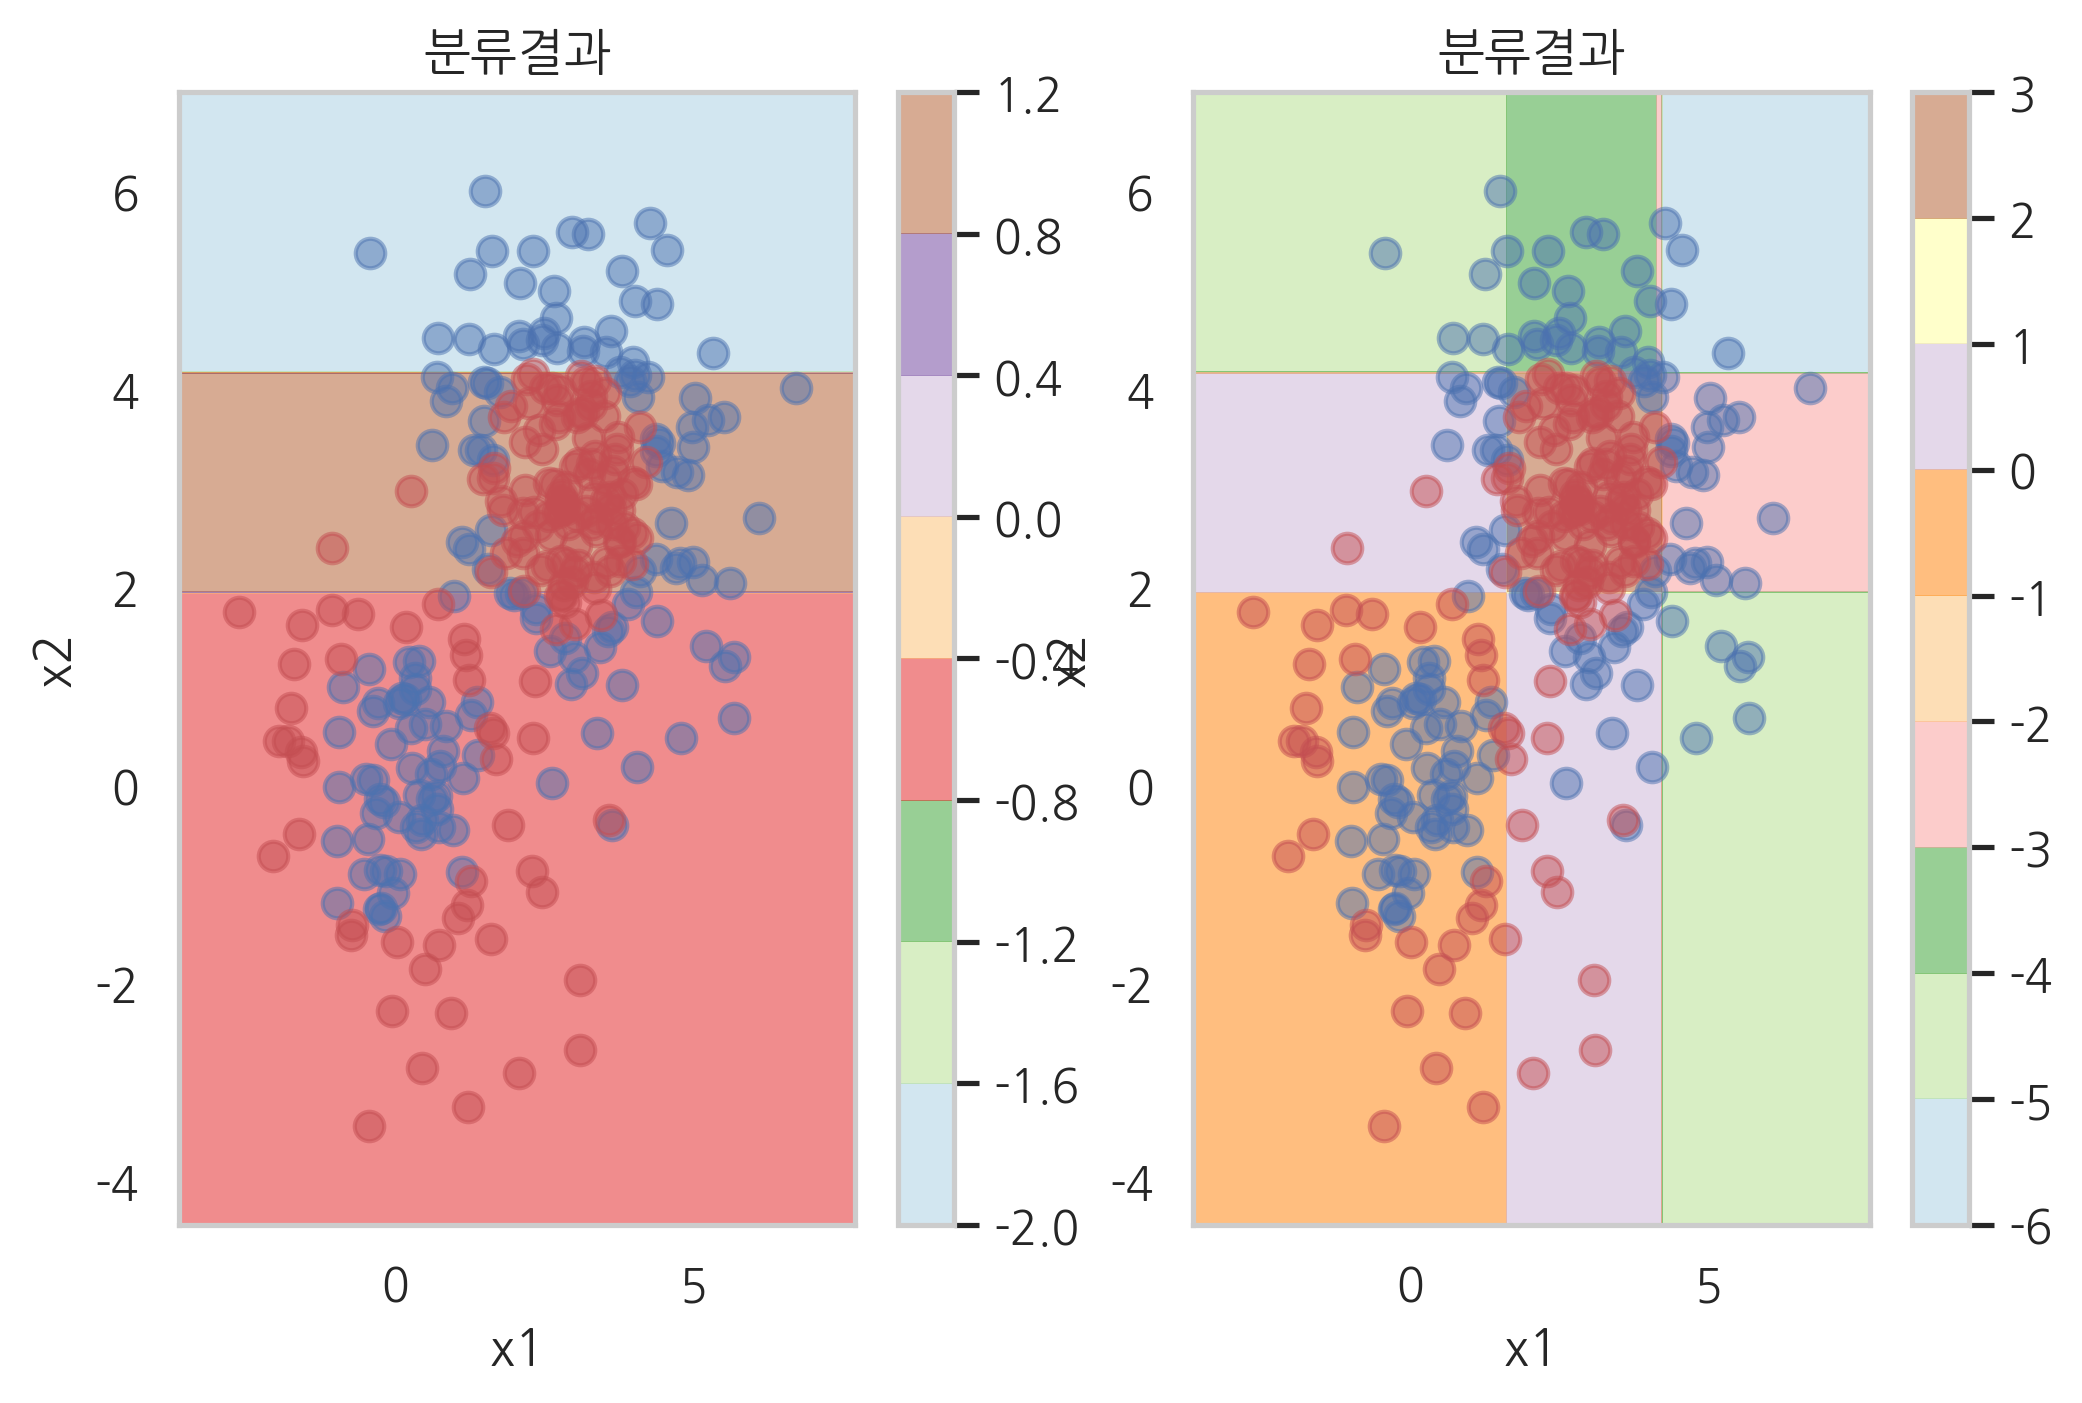

In [8]:
plt.subplot(121)
plot_result(model_grad.estimators_[2][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], 
             model_grad.estimators_[1][0],
             model_grad.estimators_[2][0]])

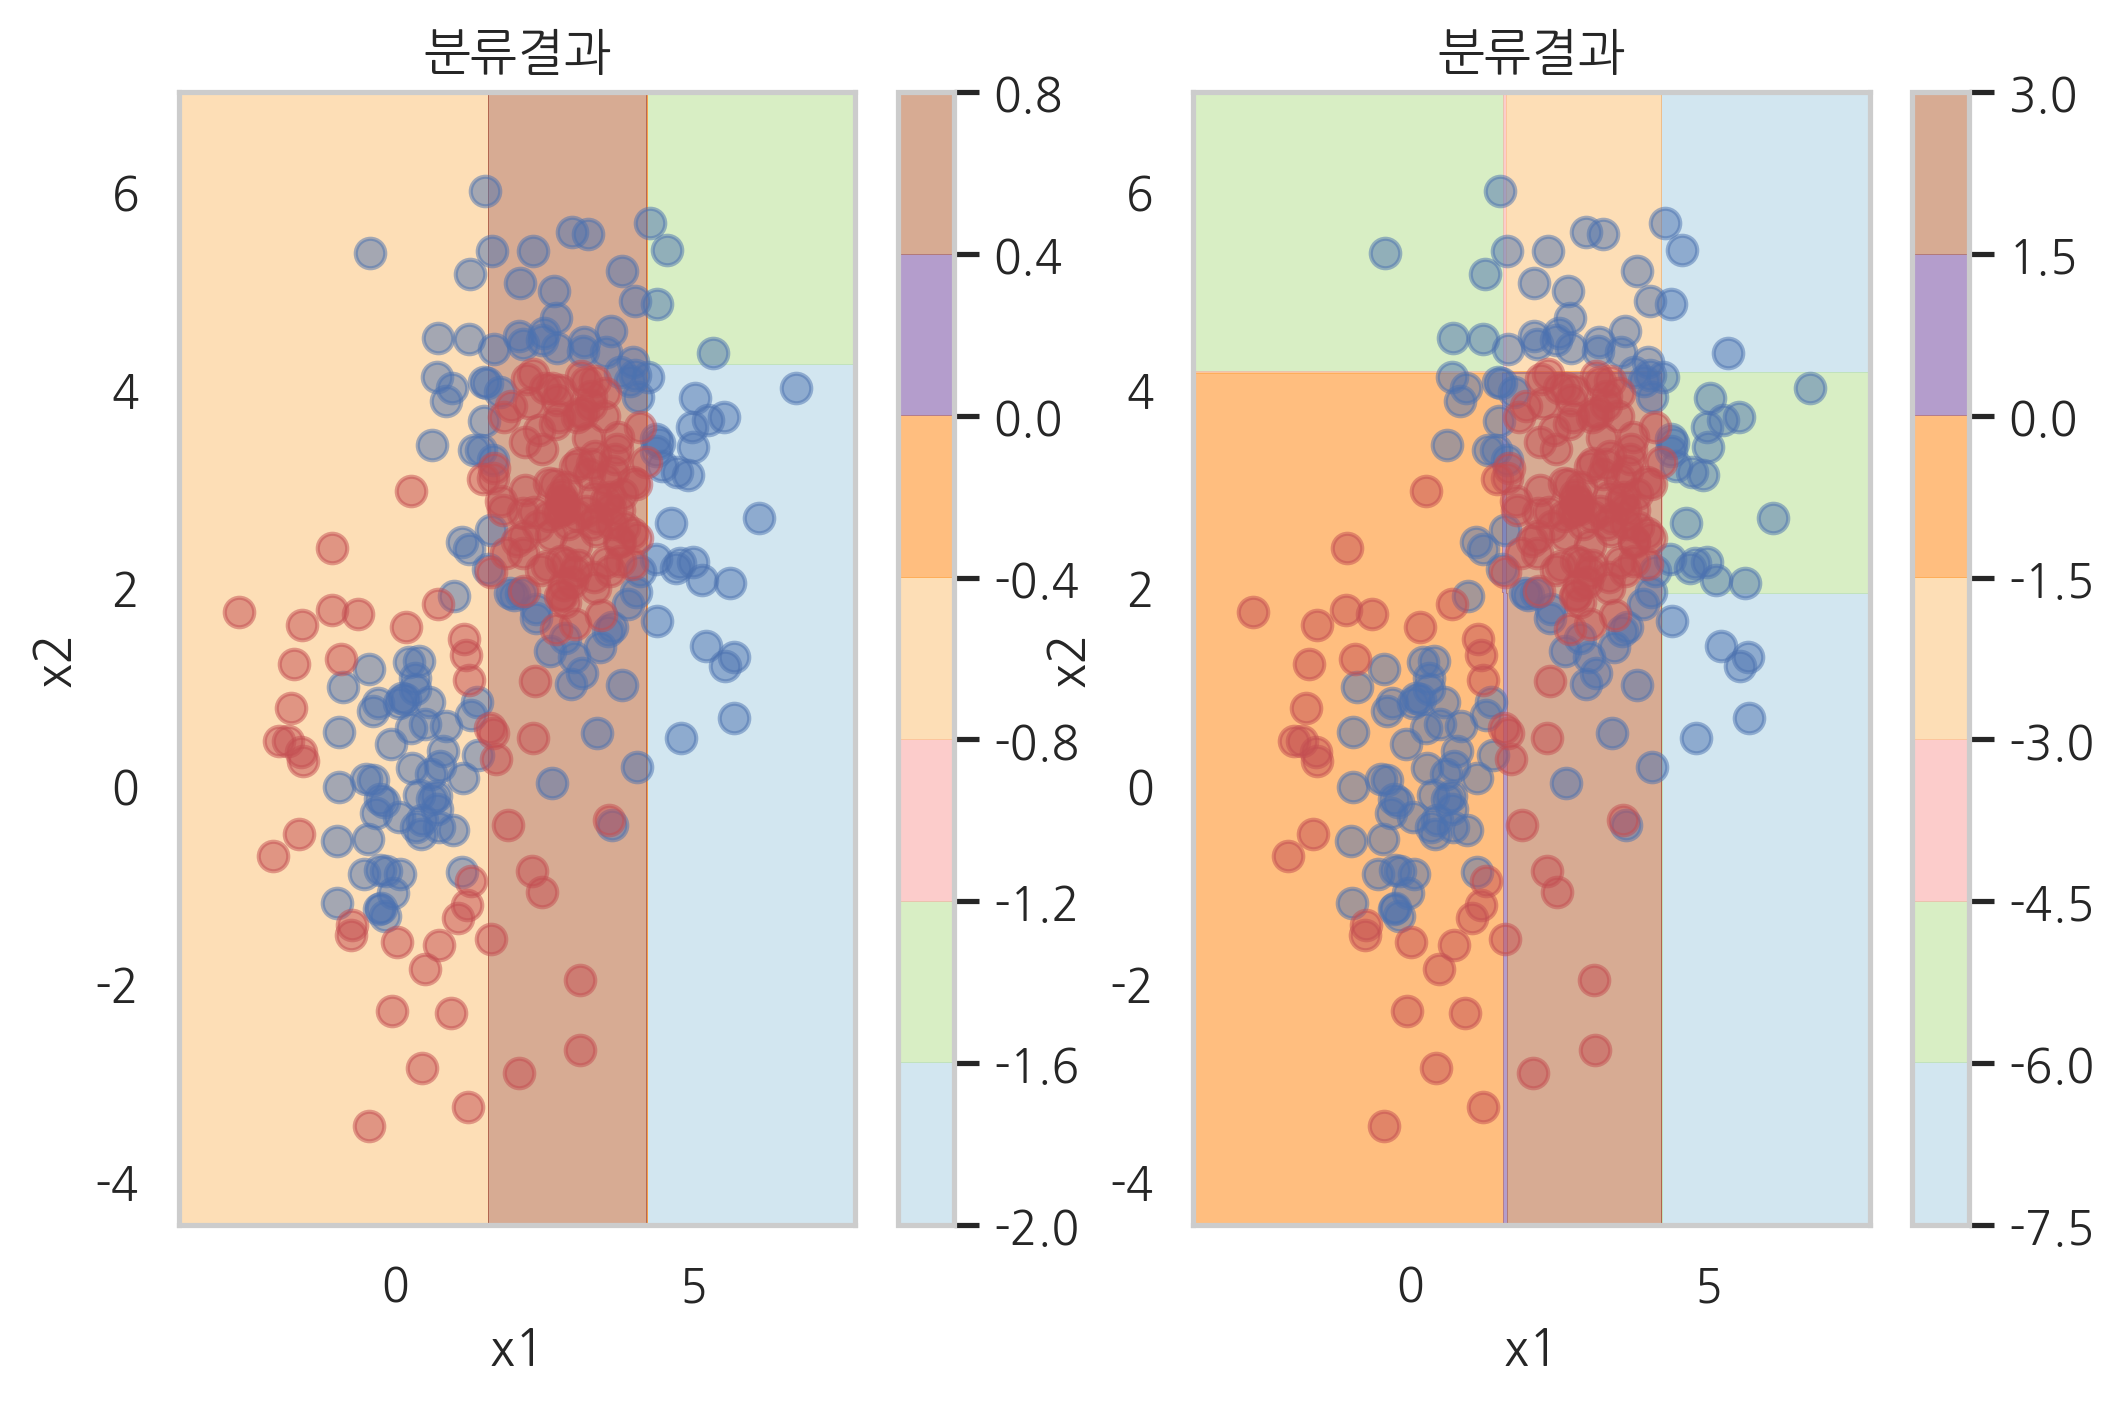

In [9]:
plt.subplot(121)
plot_result(model_grad.estimators_[3][0])
plt.subplot(122)
plot_result([model_grad.estimators_[0][0], 
             model_grad.estimators_[1][0],
             model_grad.estimators_[2][0],
             model_grad.estimators_[3][0]])

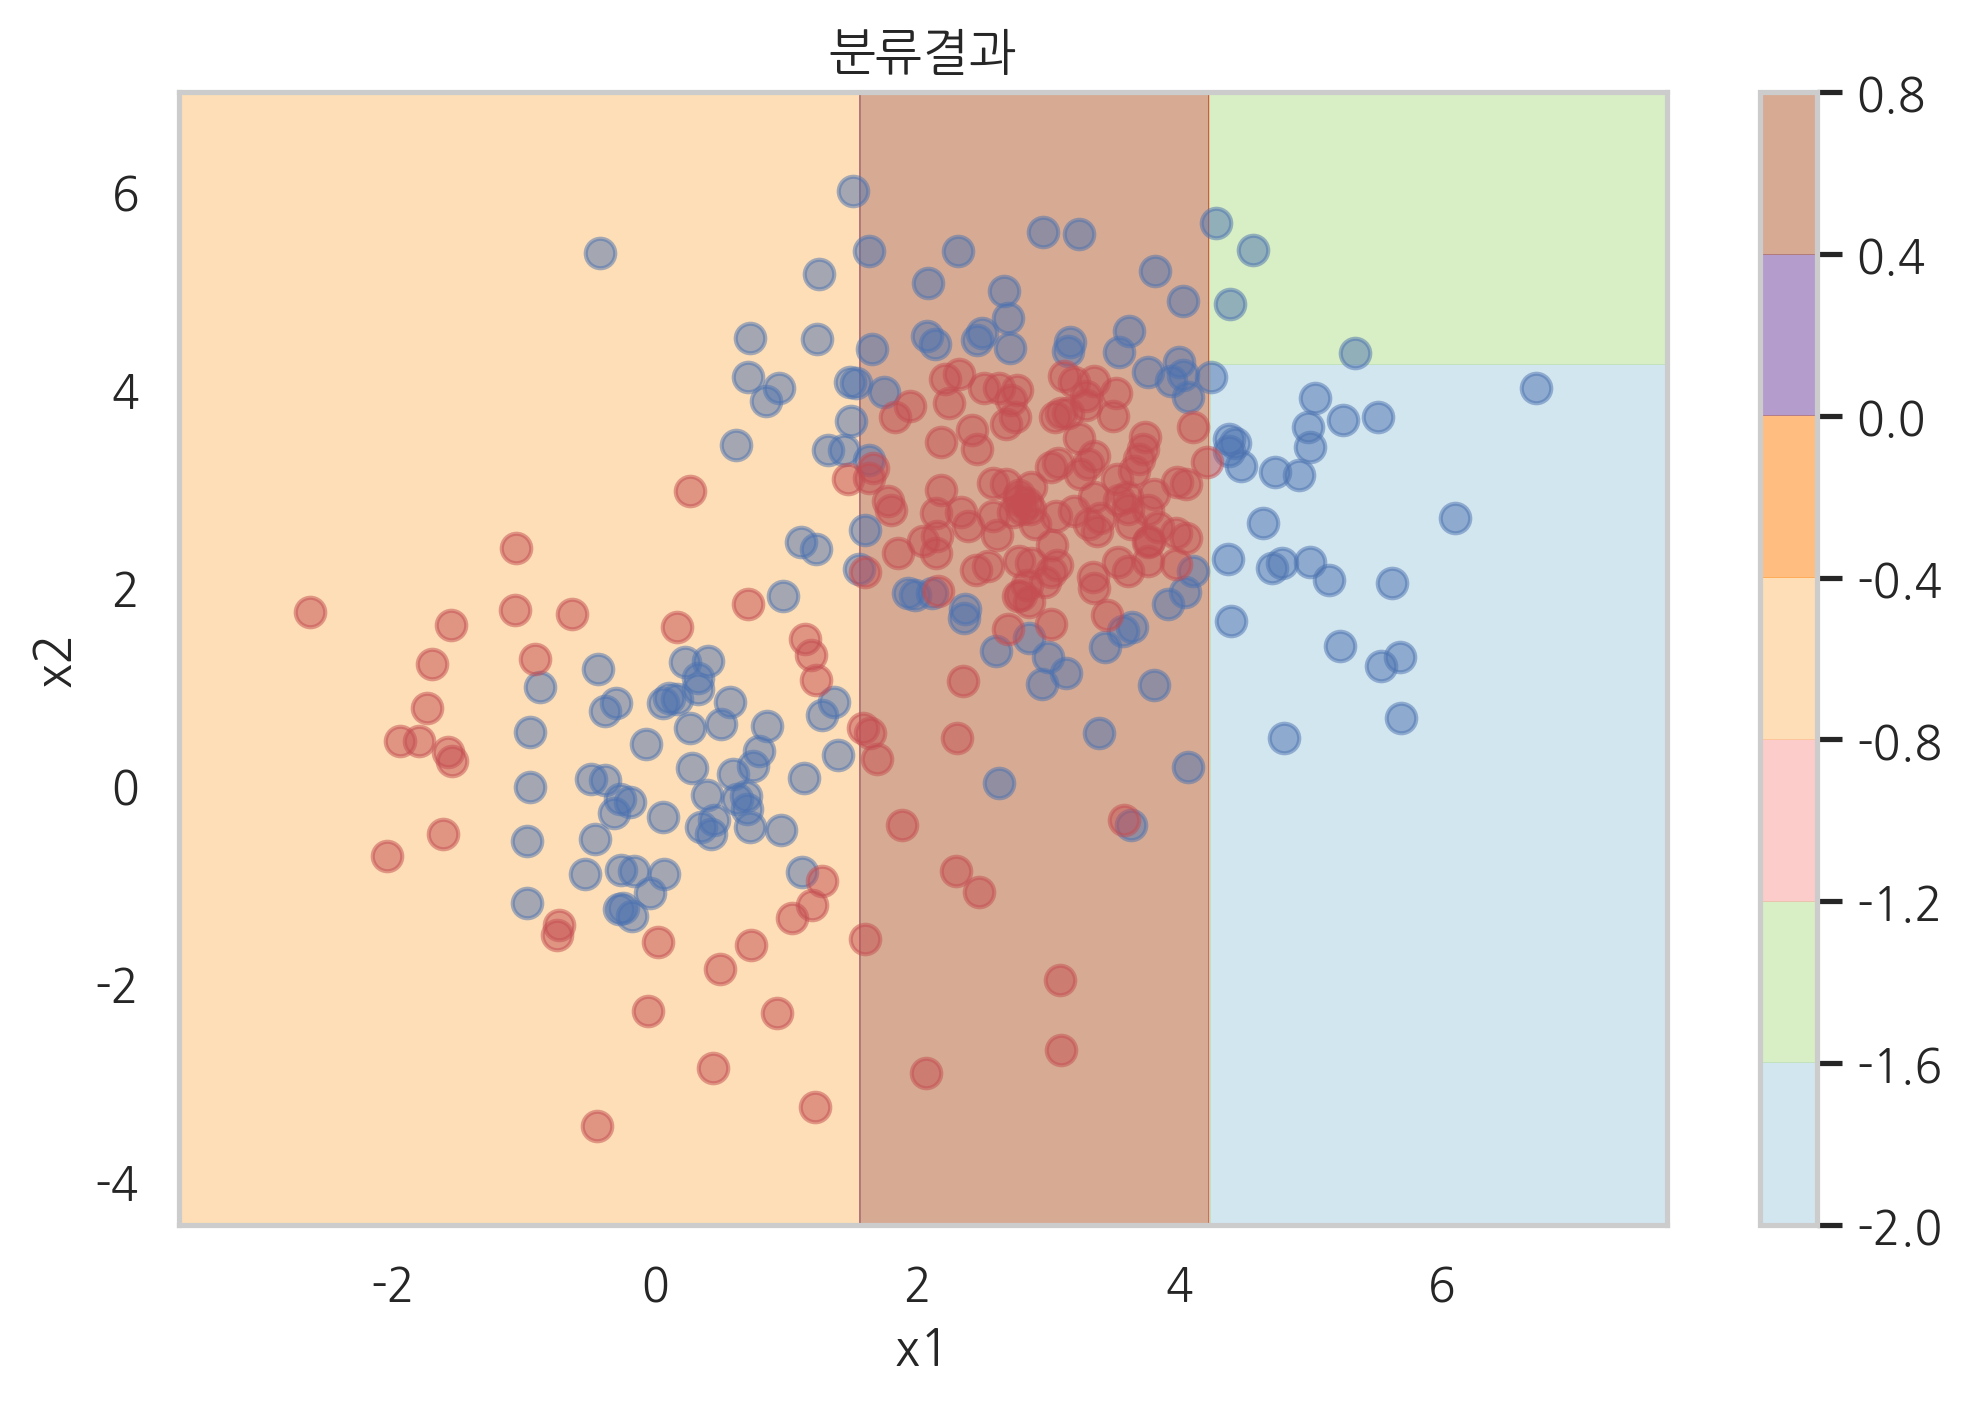

In [10]:
plot_result(model_grad.estimators_[3][0])

### XGBoost 라이브러리

In [11]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=1, random_state=0)

In [12]:
%%time
model_xgb.fit(X, y)

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 12.2 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

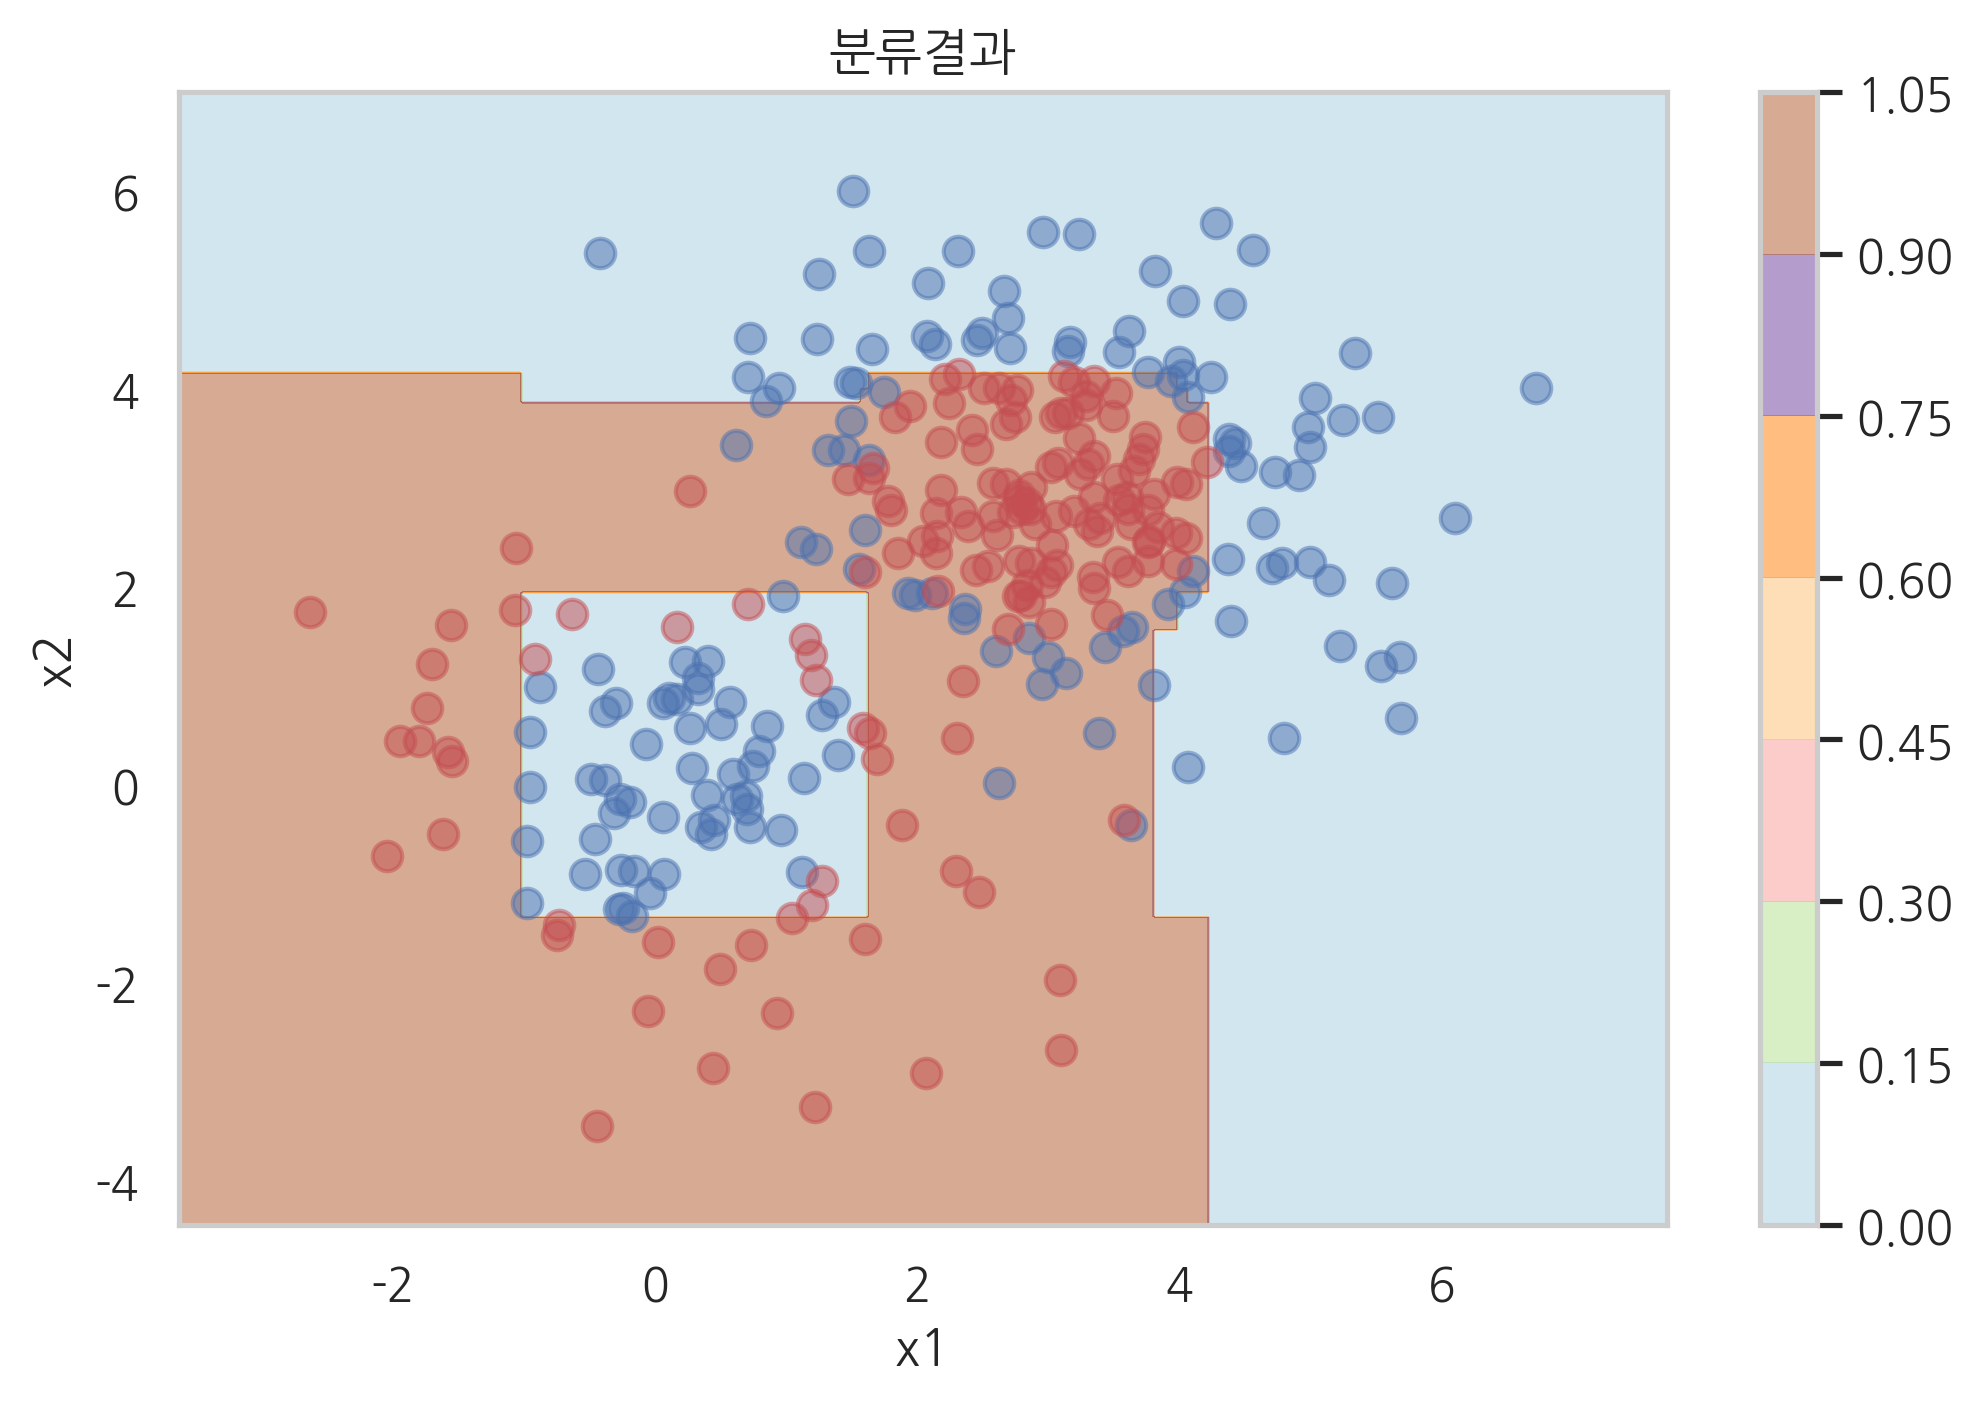

In [13]:
plot_result(model_xgb)

### LightGBM 라이브러리

In [14]:
import lightgbm

model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=1, random_state=0)

In [15]:
%%time
model_lgbm.fit(X, y)

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 15 ms


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

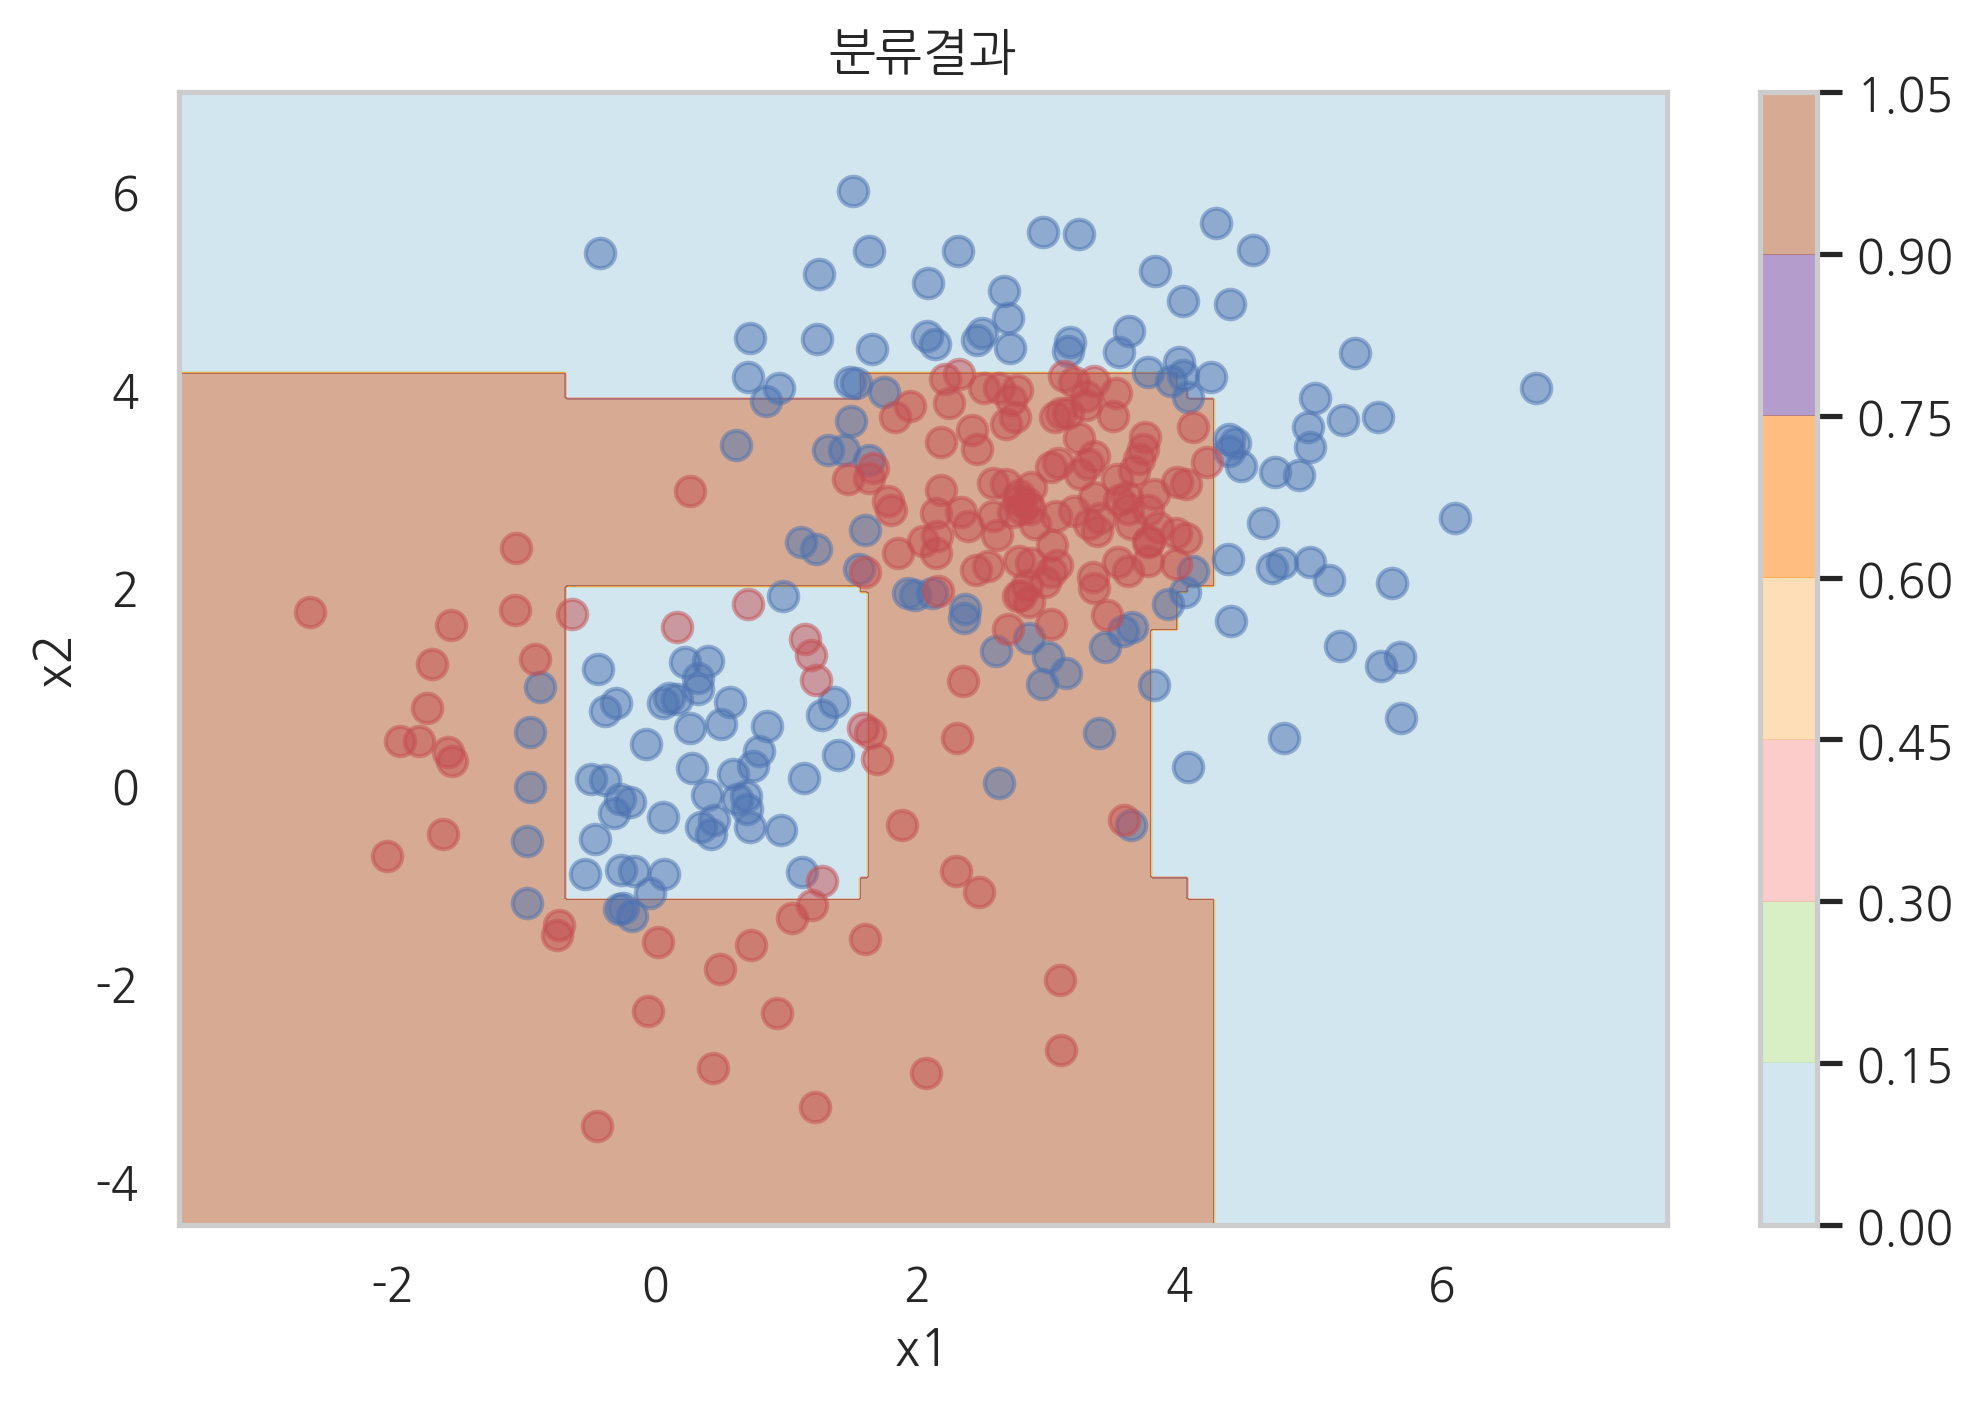

In [16]:
plot_result(model_lgbm)

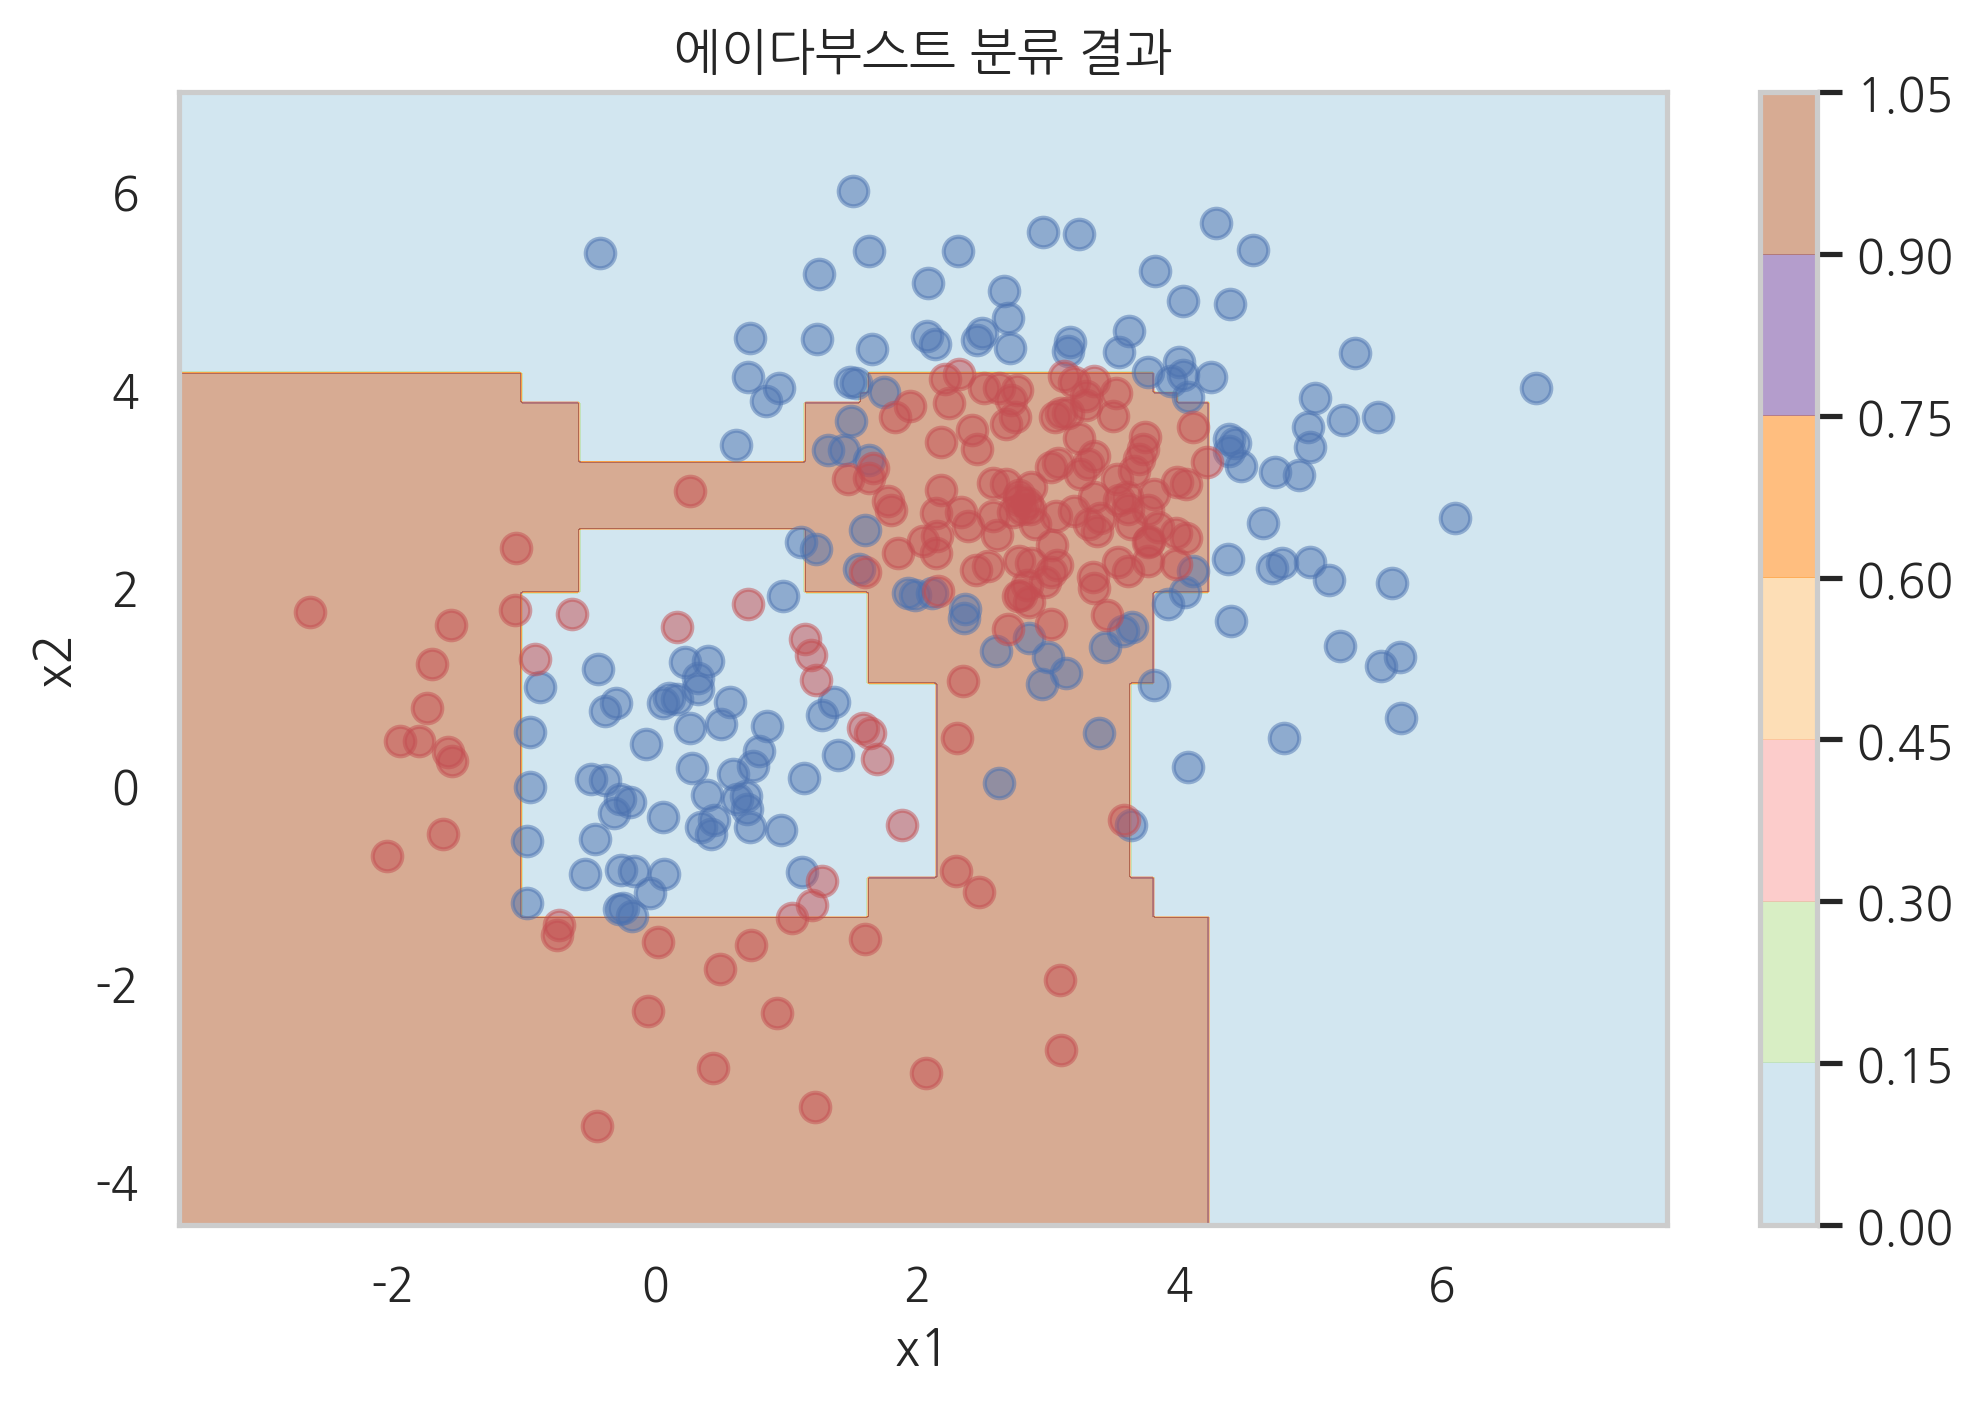

In [24]:
## 연습문제 1
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=0), 
    n_estimators=200, learning_rate=0.1).fit(X, y)
plot_result(model, "에이다부스트 분류 결과")